Привет, Андрей! 

Меня зовут Светлана Медведева и я буду проверять Твою работу. Предлагаю общаться на "ты". 

При обнаружении у Тебя в работе ошибки, в первый раз я лишь укажу на ее наличие и у Тебя будет возможность самому найти её и исправить. В реальной работе твой начальник будет поступать также, а я пытаюсь подготовить тебя именно к работе аналитиком. Однако если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

Просьба при доработке работы оставлять мои комментарии без изменений.

Комментарии я разделяю на следующие категории:

<div class="alert alert-block alert-success">
В случае если всё верно!
</div>


<div class="alert alert-block alert-warning">
В случае если можно что-то доработать, но эта доработка не критична или если есть варианты улучшения работы.
</div>

<div class="alert alert-block alert-danger">
Замечания, которые нужно исправить. Без исправления этих замечаний проект принят не может быть.
</div>

### <font color='blue'>Резензия на работу v. 1</font> <a class="tocSkip">
* В целом у Тебя хорошая работа, но требуются доработки.
* Успехов!
    
### <font color='blue'>Резензия на работу v. 2</font> <a class="tocSkip">
* Осталось совсем немного доработок. Ты на правильном пути :)
* Жду исправленную работу!
    
### <font color='blue'>Резензия на работу v. 3</font> <a class="tocSkip">
* Поздравляю, проект зачтён :)
* Успехов на следующем спринте!

# Анализ бизнес-показателей

<b><font size=5>Содержание</font></b><a name="to_content."></a>
* [1. Описание проекта](#0.)
    - [1.1. Описание данных](#0.1)
    
    
* [2. Загрузка данных](#1.)
     - [2.1. Вывод по загрузке данных](#1.1)
     

* [2. Предобработка данных](#2.)
     - [2.1. Вывод по предобработке](#2.1)
     
* [3. Рассчет метрик и построение графиков](#3.)
     - [3.1. Продуктовые метрики](#3.1)
        * [DAU](#3.1.0)
        * [WAU](#3.1.1)
        * [MAU](#3.1.2)
        * [Сколько раз за день пользователи в среднем заходят на сайт](#3.1.3)
        * [Сколько времени пользователи проводят на сайте](#3.1.4)
        * [Retention Rate](#3.1.5)
        * [Вывод](#3.1.6)
     - [3.2. Метрики электронной коммерции](#3.2)
        * [Время до покупки](#3.2.0)
        * [Среднее количество покупок на одного покупателя](#3.2.1)
        * [Средний чек](#3.2.2)
        * [LTV](#3.2.3)
        * [Вывод](#3.2.4)
     - [3.3. Маркетинговые метрики](#3.3)
        * 
        *
     

* [5. Проверка гипотез ](#6.)
     - [5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#6.1)
     - [5.2. Средние пользовательские рейтинги жанров Action и Sports разные](#6.2)


* [6. Вывод](#7.) 

## Описание проекта
<a name="0."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши. Первое задание: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
* лог сервера с данными о посещениях сайта Яндекс.Афиши
* выгрузка всех заказов за этот период
* статистика рекламных расходов

Вам предстоит изучить:
* как клиенты пользуются сервисом
* когда делают первые покупки на сайте
* сколько денег приносит компании каждый клиент
* когда расходы на привлечение клиента окупаются

### Описание данных
<a name="0.1"></a><br/>

* Структура visits_log.csv лог сервера с информацией о посещениях сайта
   * Uid — уникальный идентификатор пользователя
   * Device — категория устройства пользователя
   * Start Ts — дата и время начала сессии
   * End Ts — дата и время окончания сессии
   * Source Id — идентификатор источника перехода на сайт
* Структура orders_log.csv  информация о заказах
   * Uid — уникальный идентификатор пользователя
   * Buy Ts — дата и время заказа
   * Revenue — сумма заказа
* Структура costs.csv информация о расходах на маркетинг
   * source_id — идентификатор рекламного источника
   * dt — дата проведения рекламной кампании
   * costs — расходы на эту кампанию

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Молодец, что подробно описал проект и данные, но сформулируй, пожалуйста, цель проекта.
</div>

## Загрузка данных
<a name="1."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [1]:
# загружаю необходимые библиотеки
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# данные с посещением сайта
df_visits = pd.read_csv('/datasets/visits_log.csv')

In [3]:
# данных с заказами
df_orders = pd.read_csv('/datasets/orders_log.csv')

In [4]:
# данные расходами
df_costs = pd.read_csv('/datasets/costs.csv')

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, данные загружены.
</div>

In [5]:
display(df_visits)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [6]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [7]:
df_visits.duplicated().sum()

0

In [8]:
display(df_orders)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [9]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
df_orders.duplicated().sum()

0

In [11]:
display(df_costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [12]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [13]:
df_costs.duplicated().sum()

0

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, дубликатов в данных нет.
</div>

<a name="1.1"></a><br/>
### Вывод по загрузке данных:
    * Я загрузил три таблицы, где есть данные о посещениях сайта Яндекс.Афиши, заказах за данный период и статистики рекламных расходов
    * В данных отсутвуют дубликаты
    * Для дальнейшего удобства работы с таблицами нужно: 
        * переименновать названия столбцов
        * поменять их местами
        * изменить тип данных в столбце с датами
    

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Проверь, пожалуйста, есть ли пропуски в данных.
</div>

In [14]:
df_visits.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [15]:
df_orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [16]:
df_visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Пропусков в данных нет

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, пропусков в данных нет.
</div>

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Дополнительно можно проверить данные на соответсвие заданному в условии временному интервалу - не выходят ли сессии за его границы. Выяснить, какими устройствами пользуются посетители и нельзя ли изменить в столбце device тип данных на category. Подробней об этом типе данных - https://coderlessons.com/tutorials/python-technologies/vyuchit-python-panda/python-pandas-kategoricheskie-dannye Выяснить, какие источники трафика у нас существуют и как посетители по ним распределены.
</div>

## Предобработка данных
<a name="2."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

In [17]:
# меняю тип данных в столбцах с данными 
df_visits['End Ts'] = pd.to_datetime(df_visits['End Ts'], format = '%Y-%m-%d %H:%M:%S')
df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'], format = '%Y-%m-%d %H:%M:%S')
df_costs['dt'] = pd.to_datetime(df_costs['dt'], format = '%Y-%m-%d %H:%M:%S')
df_orders['Buy Ts'] = pd.to_datetime(df_orders['Buy Ts'], format = '%Y-%m-%d %H:%M:%S')

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, тип данных изменён верно.
</div>

In [18]:
# меняю названия столбцов
df_visits.columns=df_visits.columns.str.lower()
df_costs.columns=df_costs.columns.str.lower()
df_orders.columns=df_orders.columns.str.lower()

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отличная идея привести к одному регистру столбцы.
</div>

In [19]:
df_visits.columns.to_list()

['device', 'end ts', 'source id', 'start ts', 'uid']

In [20]:
df_visits.rename(columns={'end ts': 'end',
                         'start ts': 'start',
                         'source id': 'source'}, inplace=True)

In [21]:
df_costs.columns.to_list()

['source_id', 'dt', 'costs']

In [22]:
df_costs.rename(columns={'costs': 'cost',
                         'dt': 'date',
                         'source_id': 'source'}, inplace=True)

In [23]:
df_orders.columns.to_list()

['buy ts', 'revenue', 'uid']

In [24]:
df_orders.rename(columns={'buy ts': 'order_date'}, inplace=True)

In [25]:
# изменяю порядок столбцов
df_visits = df_visits[['start', 'end', 'device', 'source', 'uid']]

In [26]:
df_costs = df_costs[['date', 'cost', 'source']]

In [27]:
display(df_visits)

,start,end,device,source,uid
0,2017-12-20 17:20:00,2017-12-20 17:38:00,touch,4,16879256277535980062
1,2018-02-19 16:53:00,2018-02-19 17:21:00,desktop,2,104060357244891740
2,2017-07-01 01:54:00,2017-07-01 01:54:00,touch,5,7459035603376831527
3,2018-05-20 10:59:00,2018-05-20 11:23:00,desktop,9,16174680259334210214
4,2017-12-27 14:06:00,2017-12-27 14:06:00,desktop,3,9969694820036681168
...,...,...,...,...,...
359395,2017-07-29 19:07:00,2017-07-29 19:07:19,desktop,2,18363291481961487539
359396,2018-01-25 17:38:00,2018-01-25 17:38:19,touch,1,18370831553019119586
359397,2018-03-03 10:12:00,2018-03-03 10:12:19,desktop,4,18387297585500748294
359398,2017-11-02 10:12:00,2017-11-02 10:12:19,desktop,5,18388616944624776485


In [28]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
start     359400 non-null datetime64[ns]
end       359400 non-null datetime64[ns]
device    359400 non-null object
source    359400 non-null int64
uid       359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [29]:
display(df_costs)

,date,cost,source
0,2017-06-01,75.20,1
1,2017-06-02,62.25,1
2,2017-06-03,36.53,1
3,2017-06-04,55.00,1
4,2017-06-05,57.08,1
...,...,...,...
2537,2018-05-27,9.92,10
2538,2018-05-28,21.26,10
2539,2018-05-29,11.32,10
2540,2018-05-30,33.15,10


In [30]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
date      2542 non-null datetime64[ns]
cost      2542 non-null float64
source    2542 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [31]:
display(df_orders)

,order_date,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [32]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
order_date    50415 non-null datetime64[ns]
revenue       50415 non-null float64
uid           50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


<a name="2.1"></a><br/>
Вывод:
   * Я изменил порядок столбцов, тип данных и названия столбцов. Теперь таблицы имеют более удобный вид для меня.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Ок :)
</div>

## Рассчет метрик и постороение графиков 
<a name="3."></a><br/>
[<font size="2">(к содержанию)</font>](#to_content.)

### Продуктовые метрики 
<a name="3.1"></a><br/>

<a name="3.1.0"></a><br/>
#### DAU 

In [33]:
# дабавляю столбец с днем в таблицу df_visits
df_visits['date'] = df_visits['start'].astype('datetime64[D]')

In [34]:
# группирую данные о пользователях дню
dau = df_visits.groupby('date').agg({'uid':'nunique'}).sort_values(by = 'date').reset_index()

In [35]:
dau.head()

,date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


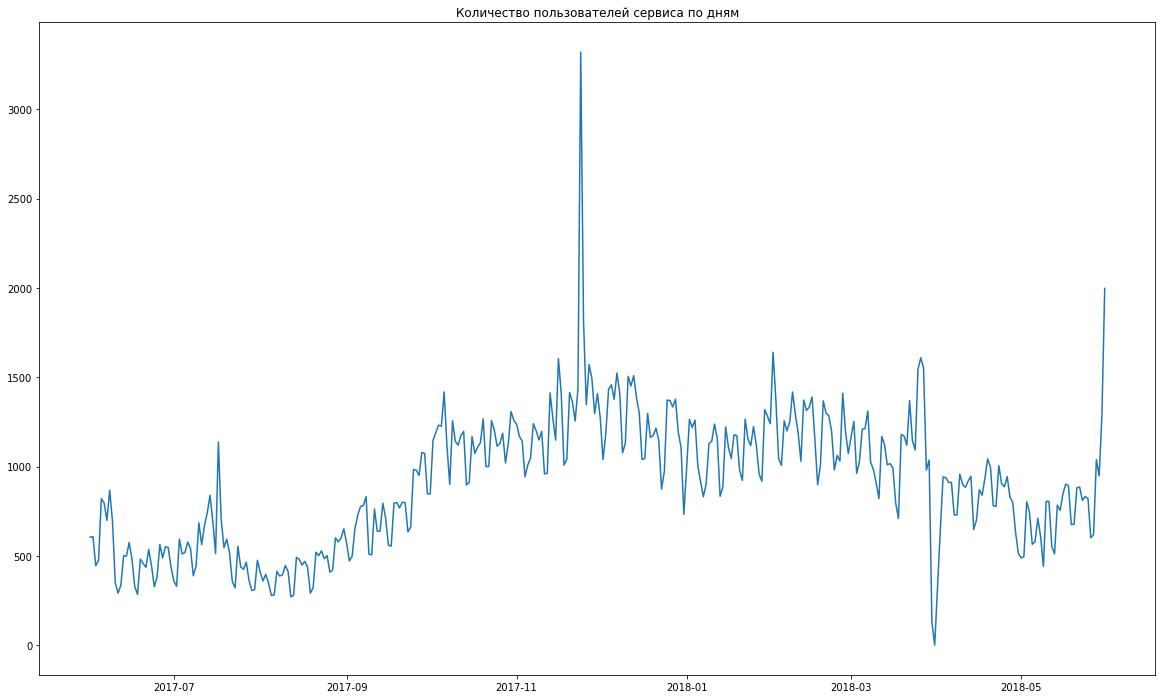

In [36]:
x = dau['date']
y = dau['uid']

plt.figure(figsize=(20, 12))
plt.plot(x , y)
plt.title('Количество пользователей сервиса по дням')
plt.show()

In [37]:
print('Среднее значение DAU за весь период:', dau['uid'].mean().round(1))

Среднее значение DAU за весь период: 908.0


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, среднее значение DAU рассчитано верно.
</div>

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Проанализируй, пожалуйста, график. Как меняется метрика с течением времени и с чем это может быть связано?
    
Просьба учесть, что после каждого графика должно быть его описание.
</div>

Мне кажется, на графике видна некоторая закономерность. Несколько дней показатель ниже, а затем несколько дней высокий. Я думаю, что это связано с тем, что люди в выходные дни пользуются интернетом меньше.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, возможно :) В выходные дни многие уезжают на природу или дачу где как правило нет интернета.
</div>

<a name="3.1.1"></a><br/>
#### WAU

In [38]:
df_visits['week'] = df_visits['start'].astype('datetime64[W]')

In [39]:
wau = df_visits.groupby('week').agg({'uid':'nunique'}).sort_values(by='week').reset_index()

In [40]:
wau.head(5)

,week,uid
0,2017-06-01,4082
1,2017-06-08,3311
2,2017-06-15,2844
3,2017-06-22,3079
4,2017-06-29,3055


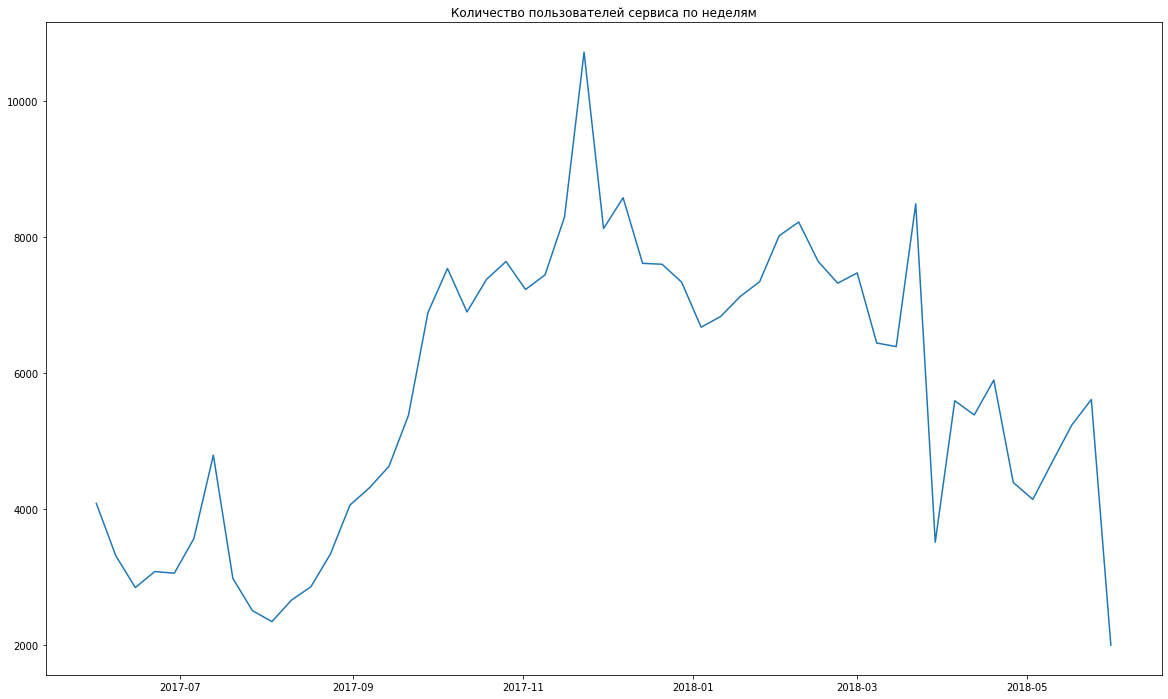

In [41]:
x = wau['week']
y = wau['uid']

plt.figure(figsize=(20, 12))
plt.plot(x, y)

plt.title('Количество пользователей сервиса по неделям')
plt.show()

In [42]:
print('Среднее значение WAU за весь период:', wau['uid'].mean().round(1))

Среднее значение WAU за весь период: 5724.4


<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Ок, но но нужно проанализировать график.
</div>

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 2:
    
Добавь, пожалуйста, описание к графику. Просьба учесть, что после каждого графика олжно быть его описание выводы.
</div>

По этому графику можно сказать, что почти с каждой неделей после лета до нового года количество уникальных пользователей увеличивается и снова медленно идёт постепенный спад к низким летним показателям. Здесь отчётливо виден резкий спад и далее резкое падение в конце марта.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 3:
    
Отлично, динамика показателя активности пользователей детально проанализирована. А с чем Ты думаешь могли быть связаны эти изменения?
</div>

<a name="3.1.2"></a><br/>
#### MAU

In [43]:
df_visits['month'] = df_visits['start'].astype('datetime64[M]')

In [44]:
mau = df_visits.groupby('month').agg({'uid':'nunique'}).sort_values(by='month').reset_index()

In [45]:
mau

,month,uid
0,2017-06-01,13259
1,2017-07-01,14183
2,2017-08-01,11631
3,2017-09-01,18975
4,2017-10-01,29692
5,2017-11-01,32797
6,2017-12-01,31557
7,2018-01-01,28716
8,2018-02-01,28749
9,2018-03-01,27473


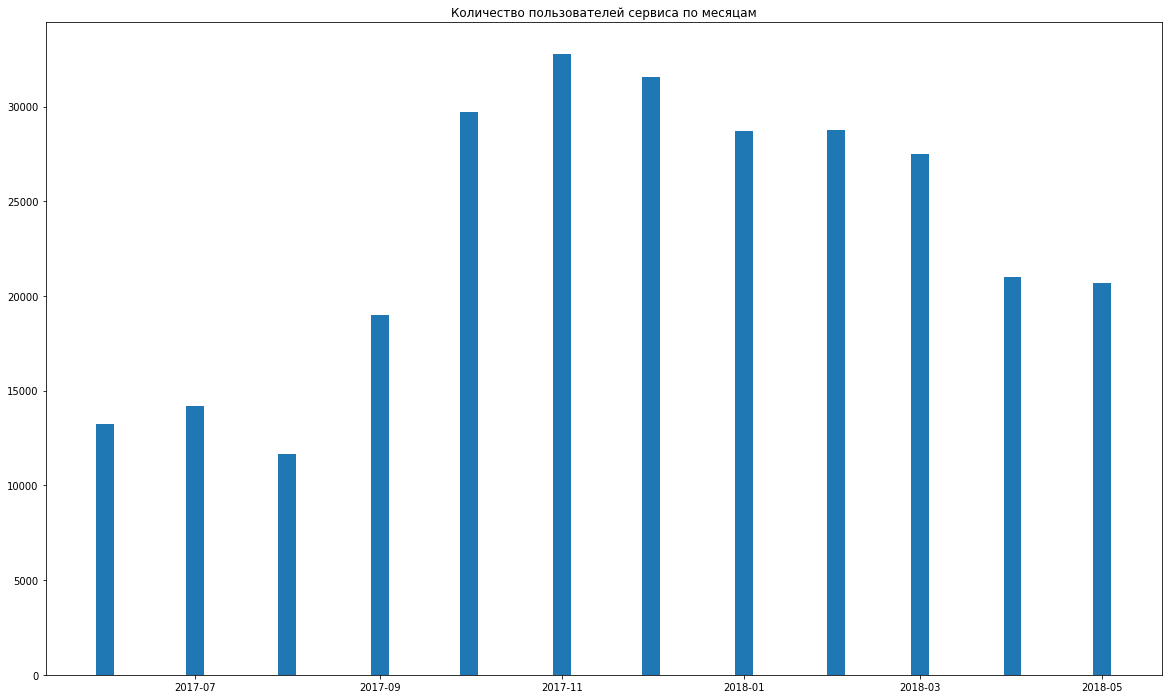

In [46]:
x = mau['month']
y = mau['uid']

plt.figure(figsize=(20, 12))
plt.bar(x,y,width = 6)
plt.title('Количество пользователей сервиса по месяцам')
plt.show()

In [47]:
print('Среднее значение MAU за весь период:', mau['uid'].mean().round(1))

Среднее значение MAU за весь период: 23228.4


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, среднее значение MAU рассчитано.
</div>

In [48]:
df_visits

,start,end,device,source,uid,date,week,month
0,2017-12-20 17:20:00,2017-12-20 17:38:00,touch,4,16879256277535980062,2017-12-20,2017-12-14,2017-12-01
1,2018-02-19 16:53:00,2018-02-19 17:21:00,desktop,2,104060357244891740,2018-02-19,2018-02-15,2018-02-01
2,2017-07-01 01:54:00,2017-07-01 01:54:00,touch,5,7459035603376831527,2017-07-01,2017-06-29,2017-07-01
3,2018-05-20 10:59:00,2018-05-20 11:23:00,desktop,9,16174680259334210214,2018-05-20,2018-05-17,2018-05-01
4,2017-12-27 14:06:00,2017-12-27 14:06:00,desktop,3,9969694820036681168,2017-12-27,2017-12-21,2017-12-01
...,...,...,...,...,...,...,...,...
359395,2017-07-29 19:07:00,2017-07-29 19:07:19,desktop,2,18363291481961487539,2017-07-29,2017-07-27,2017-07-01
359396,2018-01-25 17:38:00,2018-01-25 17:38:19,touch,1,18370831553019119586,2018-01-25,2018-01-25,2018-01-01
359397,2018-03-03 10:12:00,2018-03-03 10:12:19,desktop,4,18387297585500748294,2018-03-03,2018-03-01,2018-03-01
359398,2017-11-02 10:12:00,2017-11-02 10:12:19,desktop,5,18388616944624776485,2017-11-02,2017-11-02,2017-11-01


Вывод: можно сказать, что выручка растёт в холодное время года и падает с приходом тепла. С отктября по март выручка максимальная, а летом минимальная.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, верный вывод по метрикам.
</div>

<a name="3.1.3"></a><br/>
#### Сколько раз за день пользователи в среднем заходят на сайт

In [49]:
# считаю сколько человек заходит каждый день на сайт
visits_per_day = df_visits.groupby('date')['uid'].count().reset_index().sort_values('date', ascending=True)

In [50]:
visits_per_day

,date,uid
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893
...,...,...
359,2018-05-27,672
360,2018-05-28,1156
361,2018-05-29,1035
362,2018-05-30,1410


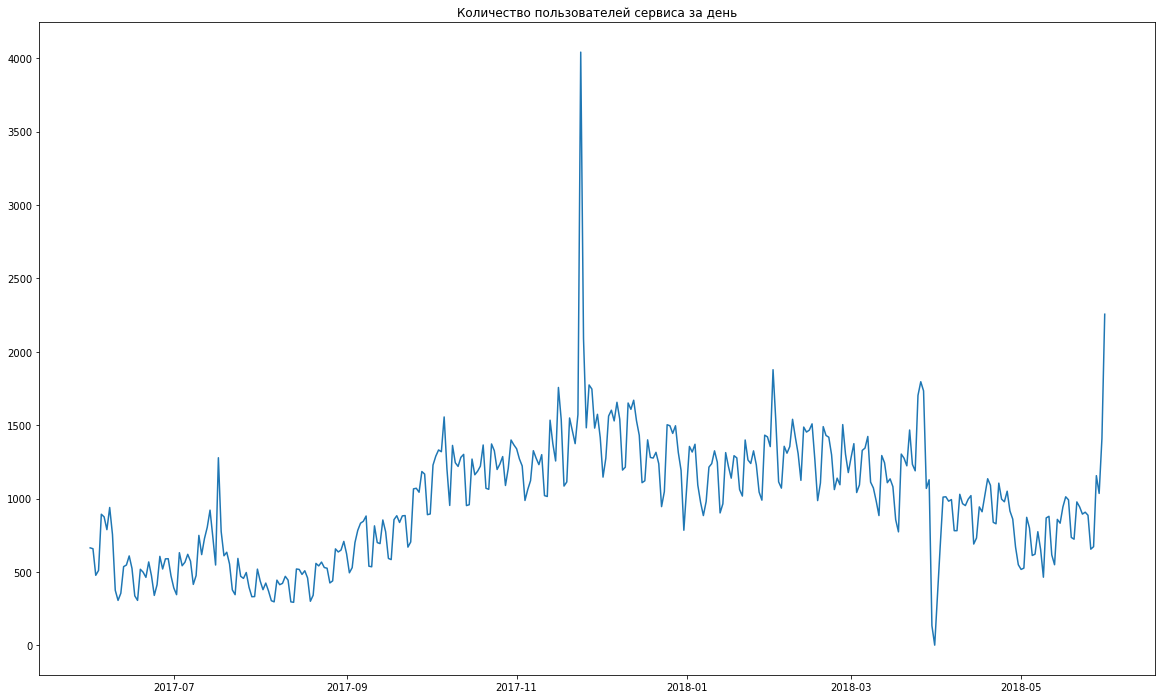

In [51]:
x = visits_per_day['date']
y = visits_per_day['uid']

plt.figure(figsize=(20, 12))
plt.plot(x,y)
plt.title('Количество пользователей сервиса за день')
plt.show()

In [52]:
print('В среднем пользователи заходят на сайт',(visits_per_day['uid']).mean().round(1),'раз в день')

В среднем пользователи заходят на сайт 987.4 раз в день


<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Рассчитай, пожалуйста, число сессий на одного пользователя в день и построй соответствующий график (изменение среднего числа сессий на одного пользователя с течением времени).
</div>

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 2:
    
Рассчитай, пожалуйста, среднее число сессий в день на одного пользователя. Ты рассчитал просто среднее число сессий без учёта пользователей.
</div>

In [53]:
visits_per_day_unique = df_visits.groupby('date')['uid'].nunique().reset_index().sort_values('date', ascending=True)

In [54]:
visits_per_day_unique.rename(columns={'uid': 'uniq_uid'}, inplace=True)

In [55]:
visits_per_day['uniq_uid'] = visits_per_day_unique['uniq_uid']

In [56]:
visits_per_day

,date,uid,uniq_uid
0,2017-06-01,664,605
1,2017-06-02,658,608
2,2017-06-03,477,445
3,2017-06-04,510,476
4,2017-06-05,893,820
...,...,...,...
359,2018-05-27,672,620
360,2018-05-28,1156,1039
361,2018-05-29,1035,948
362,2018-05-30,1410,1289


In [57]:
visits_per_day['ave'] = visits_per_day['uid']/visits_per_day['uniq_uid']

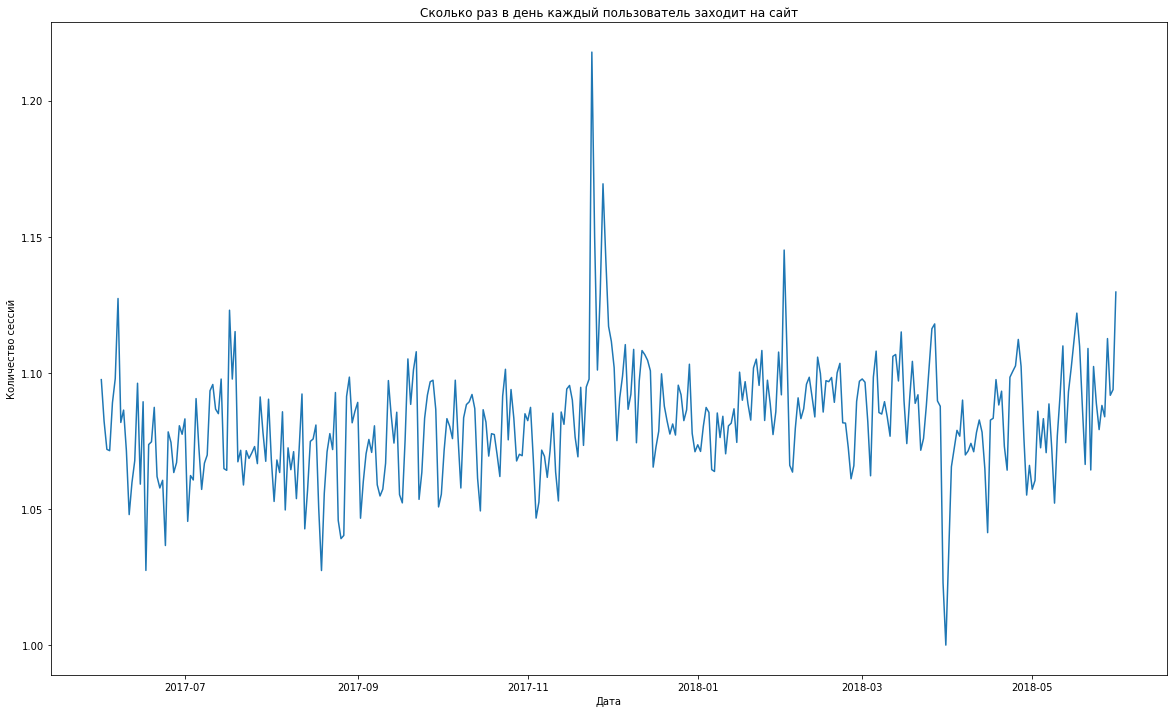

In [58]:
x = visits_per_day['date']
y = visits_per_day['ave']

plt.figure(figsize=(20, 12))
plt.plot(x,y)
plt.xlabel('Дата')
plt.ylabel('Количество сессий')
plt.title('Сколько раз в день каждый пользователь заходит на сайт')
plt.show()

In [59]:
print('В среднем на сайт каждый пользователь заходит:', visits_per_day['ave'].mean())

В среднем на сайт каждый пользователь заходит: 1.082169644003972


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 3:
    
Отлично, среднее число сессий на одного пользователя вычислено верно.
</div>

Можно сказать, что пользователи заходят на сайт не больше одного раза в день. 

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 3:
    
Да, большинство пользователей заходят один раз в день на сайт.
</div>

<a name="3.1.4"></a><br/>
#### Сколько времени пользователи проводят на сайте

In [60]:
# определяю количество секунд за сессию
df_visits['duration'] = (df_visits['end'] - df_visits['start']).dt.seconds

In [61]:
df_visits

,start,end,device,source,uid,date,week,month,duration
0,2017-12-20 17:20:00,2017-12-20 17:38:00,touch,4,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080
1,2018-02-19 16:53:00,2018-02-19 17:21:00,desktop,2,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680
2,2017-07-01 01:54:00,2017-07-01 01:54:00,touch,5,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0
3,2018-05-20 10:59:00,2018-05-20 11:23:00,desktop,9,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,1440
4,2017-12-27 14:06:00,2017-12-27 14:06:00,desktop,3,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,0
...,...,...,...,...,...,...,...,...,...
359395,2017-07-29 19:07:00,2017-07-29 19:07:19,desktop,2,18363291481961487539,2017-07-29,2017-07-27,2017-07-01,19
359396,2018-01-25 17:38:00,2018-01-25 17:38:19,touch,1,18370831553019119586,2018-01-25,2018-01-25,2018-01-01,19
359397,2018-03-03 10:12:00,2018-03-03 10:12:19,desktop,4,18387297585500748294,2018-03-03,2018-03-01,2018-03-01,19
359398,2017-11-02 10:12:00,2017-11-02 10:12:19,desktop,5,18388616944624776485,2017-11-02,2017-11-02,2017-11-01,19


In [62]:
df_visits['duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration, dtype: float64

По describe я вижу, что есть нуливые сессии и очень длинные, которые мешаю определить среднее время. 

In [63]:
# для начала удаляю нулевые значения 
df_dur = df_visits.query('duration > 0')

In [64]:
df_dur['duration'].describe()

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: duration, dtype: float64

In [65]:
# смотрю экстремальные значения
print(np.percentile(df_dur['duration'], [1, 99])) 

[  60. 4680.]


In [66]:
# и удаляю их тоже 
df_dur = df_visits.query('60 < duration < 4680')

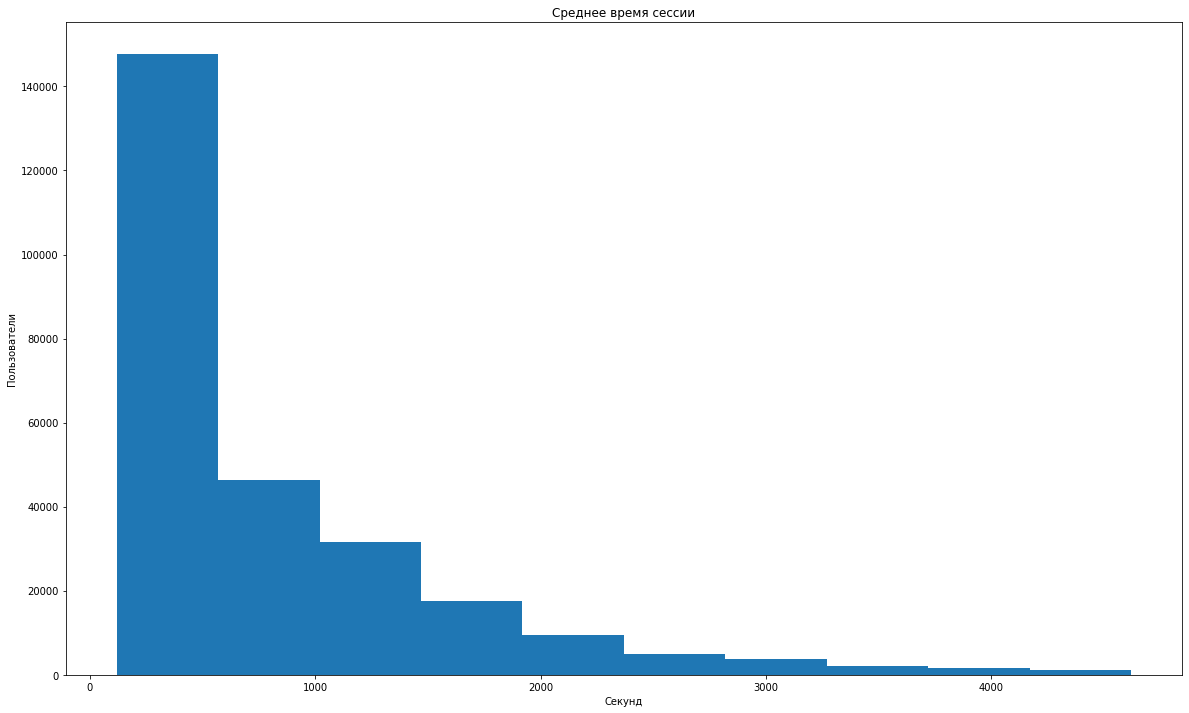

In [67]:
x = df_dur['duration']

plt.figure(figsize=(20, 12))
plt.hist(x)
plt.xlabel('Секунд')
plt.ylabel('Пользователи')
plt.title('Среднее время сессии')
plt.show()

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Молодец, что не забыл добавить заголовок к графику, но нужно добавить подписи по осям.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, так график смотрится намного лучше :)
</div>

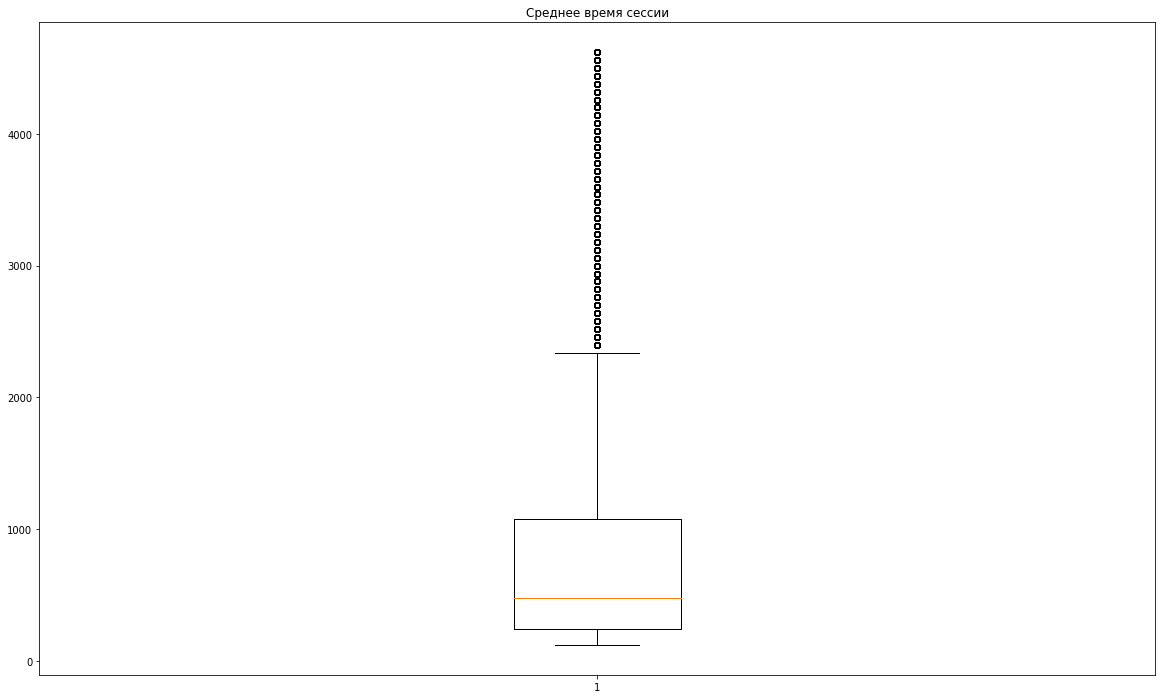

In [68]:
x = df_dur['duration']

plt.figure(figsize=(20, 12))
plt.boxplot(x)
plt.title('Среднее время сессии')
plt.show()

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Необходимо проанализировать графики и сформулировать вывод о подходящей средней меры исходя из формы распределения  длины сессий.
</div>

Так как я отрезал уже по проценту самых маленьких и самых больших значений, я решил, что могу взять за среднее именно среднее число, а не мелиану или моду.

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
На самом деле лучше брать моду или медиану из того что распределение далеко от нормального.
</div>

In [69]:
df_dur['duration'].describe()

count    266442.000000
mean        770.316842
std         772.682103
min         120.000000
25%         240.000000
50%         480.000000
75%        1080.000000
max        4620.000000
Name: duration, dtype: float64

In [70]:
print('В среднем пользователи проводят на сайте',(df_dur['duration'].mean()/60).round(0),'минут')

В среднем пользователи проводят на сайте 13.0 минут


<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
А какой можно сделать вывод из полученного значения?
</div>

Возможно, это очень большое время для проведеня на сайте. Может быть он очень хороший и затягивает, а может быть людям сложно найти нужную информацию.

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
Если брать моду, то значение получится меньше.
</div>

<a name="3.1.5"></a><br/>
#### Retention Rate

In [71]:
first_activity_date = df_visits.groupby(['uid'])['start'].min()

In [72]:
first_activity_date.name = 'first_activity_date'

In [73]:
df_visits = df_visits.join(first_activity_date,on='uid') 

In [74]:
df_visits.head(3)

,start,end,device,source,uid,date,week,month,duration,first_activity_date
0,2017-12-20 17:20:00,2017-12-20 17:38:00,touch,4,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,1080,2017-12-20 17:20:00
1,2018-02-19 16:53:00,2018-02-19 17:21:00,desktop,2,104060357244891740,2018-02-19,2018-02-15,2018-02-01,1680,2018-02-19 16:53:00
2,2017-07-01 01:54:00,2017-07-01 01:54:00,touch,5,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00


In [75]:
df_visits['first_activity_month'] = df_visits['first_activity_date'].astype('datetime64[M]')

In [76]:
#рассчитываю lifetime
df_visits['cohort_lifetime'] = df_visits['month'] - df_visits['first_activity_month']

In [77]:
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'] / np.timedelta64(1,'M')

In [78]:
df_visits['cohort_lifetime'] = df_visits['cohort_lifetime'].round().astype('int')

In [79]:
# создаю новую таблицу с кагортами
cohorts = df_visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [80]:
# нахожу исходное количество юзеров на первый месяц
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_activity_month', 'uid']
]

In [81]:
# добавляю к таблице с когортами количество пользователей 
cohorts = cohorts.merge(initial_users_count,on='first_activity_month') 

In [82]:
cohorts

,first_activity_month,cohort_lifetime,uid_x,uid_y
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
...,...,...,...,...
73,2018-03-01,1,861,20589
74,2018-03-01,2,557,20589
75,2018-04-01,0,15709,15709
76,2018-04-01,1,760,15709


In [83]:
# нахожу Retention Rate
cohorts['retention'] = cohorts['uid_x']/cohorts['uid_y'] 

In [84]:
# делаю сводную таблицу
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 

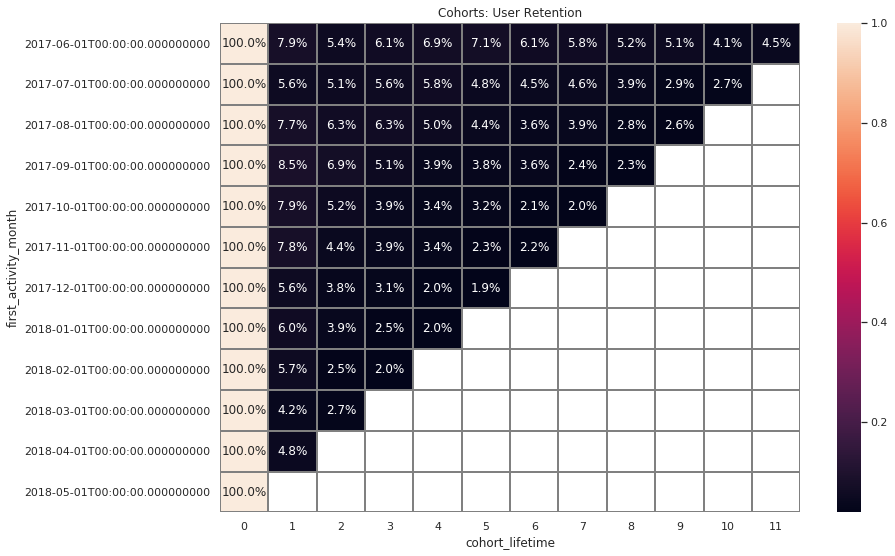

In [85]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Отлично, Retention Rate рассчитан верно. 
    
Подумай, пожалуйста, над удалением "00:00:00" в датах. Кроме того, советую использовать параметр vmax метода heatmap и удалить 0-й период для более информативного отображения.
</div>

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 3:
    
Подсказка как можно удалить "00:00:00" с дат: https://coderoad.ru/28247778/Python-Pandas-%D1%83%D0%B4%D0%B0%D0%BB%D0%B8%D1%82%D1%8C-%D0%B4%D0%B0%D1%82%D1%83-%D0%B8%D0%B7-timestamp
</div>

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Рассчитай, пожалуйста, среднее значение Retention Rate за второй месяц жизни когорт.
</div>

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 2:
    
Не нахожу расчёта среднего значения Retention Rate за второй месяц жизни когорт. Добавь, пожалуйста.
</div>

In [86]:
retention_pivot.reset_index()

cohort_lifetime,first_activity_month,0,1,2,3,4,5,6,7,8,9,10,11
0,2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
1,2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2,2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
3,2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
4,2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
5,2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
6,2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-03-01,1.0,0.041818,0.027053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
print('Средний Retention Rate на второй месяц жизни кагорт:',(retention_pivot[1].mean() * 100).round(3),'%')

Средний Retention Rate на второй месяц жизни кагорт: 6.517 %


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 3:
    
Да, средний Retention Rate на второй месяц жизни когорт вычислен верно.
    
Обрати, пожалуйста, внимание на то, что у нас <b>когорты</b>, а не кагорты.
</div>

<a name="3.1.6"></a><br/>
Вывод:
Не смотря на то, что возвращаемость низкая, первая когорта на протяжении всей своей жизни показывала наилучшие результаты. Никогда не опускалась ниже 4 процентов, в то время как почти все другие когорты опускали ниже уже на 4 месяц жизни.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, наилучшая когорта выбрана.
</div>

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Проанализируй, пожалуйста, как меняется Retention Rate с течением времени (снижается, повышается?)?
</div>

Не смотря на то, что первая когорта показала лучшие результаты, она как и все остальные показывает снижение Retention Rate. 

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, наблюдается снижение Retention Rate с течением времени.
</div>

### Метрики электронной коммерции

#### Время с первого посещения сайта до покупки

In [88]:
# из таблицы с визитами нахожу первый визит для каждого пользователя
first_visit = df_visits.groupby(['uid']).agg({'start':'min'})

In [89]:
first_visit

,start
uid,
11863502262781,2018-03-01 17:27:00
49537067089222,2018-02-06 15:55:00
297729379853735,2017-06-07 18:47:00
313578113262317,2017-09-18 22:49:00
325320750514679,2017-09-30 14:29:00
...,...
18446403737806311543,2017-11-30 03:36:00
18446424184725333426,2017-12-06 20:32:00
18446556406699109058,2018-01-01 16:29:00


In [90]:
# из таблицы с заказами нахожу время первого заказа для пользователя
first_order = df_orders.groupby(['uid']).agg({'order_date':'min'})

In [91]:
first_order

,order_date
uid,
313578113262317,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00
2429014661409475,2017-10-11 18:33:00
2464366381792757,2018-01-28 15:54:00
2551852515556206,2017-11-24 10:14:00
...,...
18445147675727495770,2017-11-24 09:03:00
18445407535914413204,2017-09-22 23:55:00
18445601152732270159,2018-03-26 22:54:00


In [92]:
# соединяю эти таблицы
time_visit_to_order = first_order.join(first_visit,)

In [93]:
time_visit_to_order

,order_date,start
uid,,
313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00
...,...,...
18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00
18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00
18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00


In [94]:
# нахожу время между между первым визитом и покупкой в минутах
time_visit_to_order['time'] = (time_visit_to_order['order_date'] - time_visit_to_order['start']) / np.timedelta64(1, 'm')

In [95]:
time_visit_to_order

,order_date,start,time
uid,,,
313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,154022.0
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,79.0
2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1184.0
2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0
...,...,...,...
18445147675727495770,2017-11-24 09:03:00,2017-08-20 13:30:00,137973.0
18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00,7.0
18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00,333303.0


In [96]:
time_visit_to_order.describe()

,time
count,36523.000000
mean,24340.175834
std,67784.774690
min,0.000000
25%,4.000000
50%,16.000000
75%,2897.000000
max,523144.000000


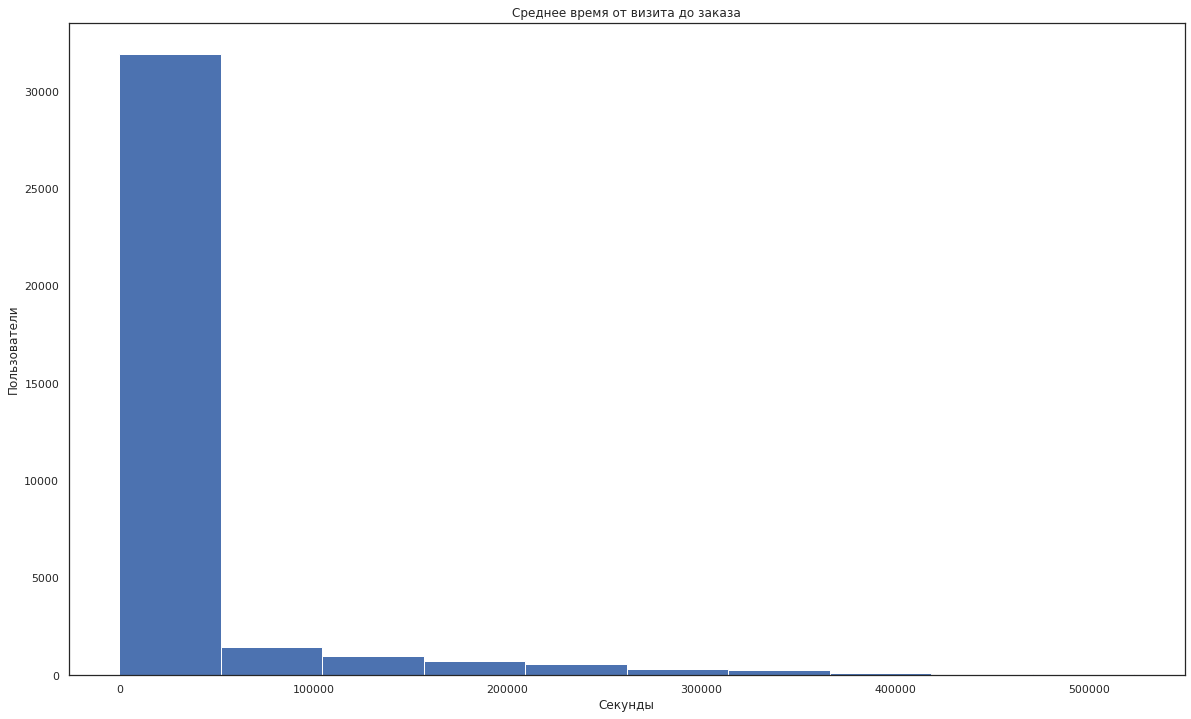

In [97]:
x = time_visit_to_order['time']

plt.figure(figsize=(20, 12))
plt.hist(x)
plt.xlabel('Секунды')
plt.ylabel('Пользователи')
plt.title('Среднее время от визита до заказа')
plt.show()

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 2:
    
Проанализируй, пожалуйста, график. Просьба учесть, что после каждого графика должно быть его описание и выводы.
</div>

Здесь видно, что распределение не нормальное и дальше нужно будет посмотреть на диаграмму распределения и удалить нулевые значения. Для их появления очевидн  

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 3:
    
Да, верно распределение далеко от нормального. Похоже, что не все изменения в работе сохранились: "появления очевидн".
</div>

In [98]:
# я считаю, что здесь тоже нужно удалить нулевые значения, так как, мне кажется, невозможно зайти на сайт и купить билеты за 0 секунд
time = time_visit_to_order.query('time > 0')

In [99]:
print(np.percentile(time['time'], [5, 95])) 

[1.0000000e+00 1.8593505e+05]


In [100]:
time = time.query('2.00000e+00< time < 1.73984e+05')

In [101]:
time.describe()

,time
count,27419.000000
mean,13516.887888
std,33359.671833
min,3.000000
25%,8.000000
50%,30.000000
75%,4002.000000
max,173977.000000


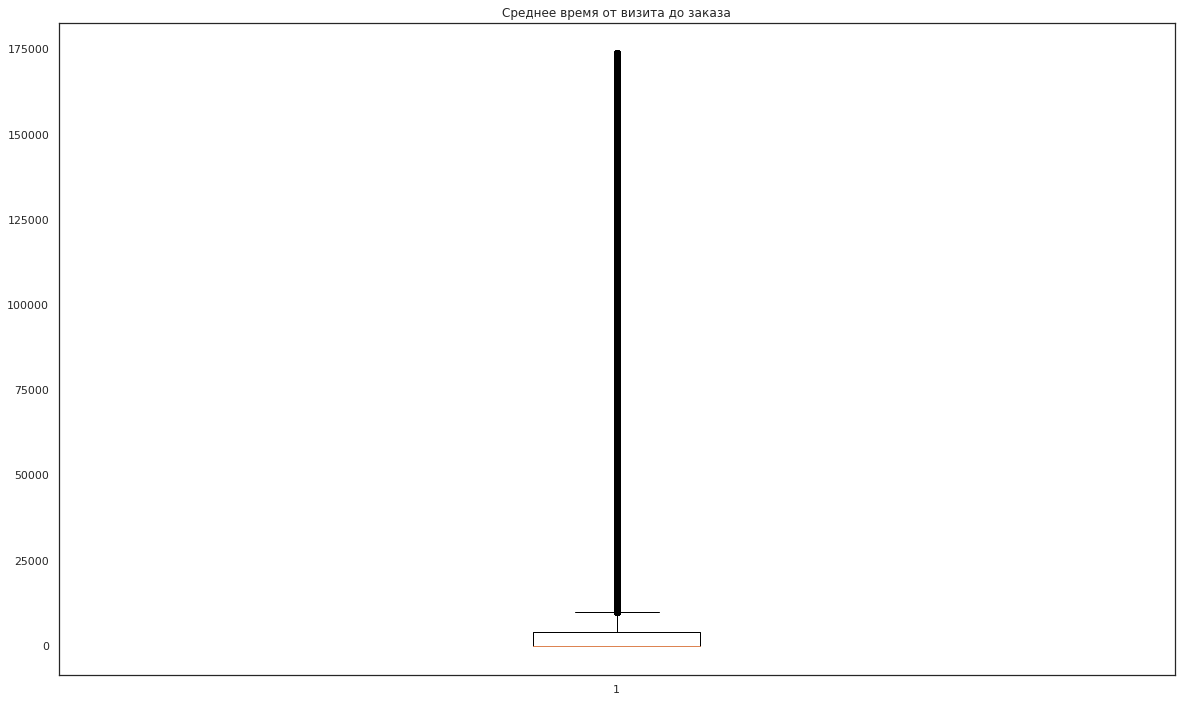

In [102]:
x = time['time']

plt.figure(figsize=(20, 12))
plt.boxplot(x)
plt.title('Среднее время от визита до заказа')
plt.show()

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Необходимо проанализировать графики.
</div>

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
Добавь, пожалуйста, описание того, что мы видим на графике. Ниже Ты верно отметил с чем может быть связано большое число выбросов, но нужно как-то более плавно прейти от графика к выводу.
</div>

In [103]:
print('Среднее время от перого посещения сайта до покупки около:',time['time'].median().round(0), 'минут')

Среднее время от перого посещения сайта до покупки около: 30.0 минут


Вывод: я думаю, что большое количество выбросов связано с тем, что люди заходят на сайт, смотрят, но не покупают билеты сразу. Например, узнают о каком-то мероприятии за полгода и хотят посмотреть стоимость билетов. Тем не менее средняя время от захода на сайт до заказа около 30 минут. 

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Укажи, пожалуйста, единицу измерения в "Среднее время от перого посещения сайта до покупки около: 30.0".
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, единица измерения добавлена. 👍👍👍
</div>

#### Среднее количество покупок 

In [104]:
display(df_orders)

,order_date,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [105]:
df_orders['month'] = df_orders['order_date'].astype('datetime64[M]')
display(df_orders)

,order_date,revenue,uid,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01


In [106]:
buyers = df_orders.pivot_table(index='month', 
                            values=['order_date', 'uid'], 
                            aggfunc={'order_date':'count', 'uid':'nunique'}).reset_index()
display(buyers)

,month,order_date,uid
0,2017-06-01,2354,2023
1,2017-07-01,2363,1984
2,2017-08-01,1807,1472
3,2017-09-01,3387,2750
4,2017-10-01,5679,4675
5,2017-11-01,5659,4547
6,2017-12-01,6218,4942
7,2018-01-01,4721,3898
8,2018-02-01,5281,4258
9,2018-03-01,5326,4181


In [107]:
buyers.rename(columns={'order_date':'purchases', 'uid':'uids'}, inplace=True)

In [108]:
buyers = buyers.loc[5:10, 'purchases':'uids']
buyers

,purchases,uids
5,5659,4547
6,6218,4942
7,4721,3898
8,5281,4258
9,5326,4181
10,3273,2744


In [109]:
buyers = buyers.cumsum()
buyers['orders_on_buyer'] = buyers['purchases'] / buyers['uids']
buyers

,purchases,uids,orders_on_buyer
5,5659,4547,1.244557
6,11877,9489,1.251660
7,16598,13387,1.239860
8,21879,17645,1.239955
9,27205,21826,1.246449
10,30478,24570,1.240456


In [110]:
print('Среднее количество покупок на пользователя за последние 6 месяцев:',buyers['orders_on_buyer'].mean().round(1))

Среднее количество покупок на пользователя за последние 6 месяцев: 1.2


#### Средний чек

In [111]:
df_orders['order_month'] = df_orders['order_date'].astype('datetime64[M]')

In [112]:
revenue_by_date = df_orders.groupby('order_month')['revenue'].mean().reset_index()

In [113]:
revenue_by_date

,order_month,revenue
0,2017-06-01,4.060106
1,2017-07-01,5.306589
2,2017-08-01,4.847139
3,2017-09-01,5.416448
4,2017-10-01,4.928280
5,2017-11-01,4.783518
6,2017-12-01,5.852139
7,2018-01-01,4.112927
8,2018-02-01,4.840095
9,2018-03-01,5.413930


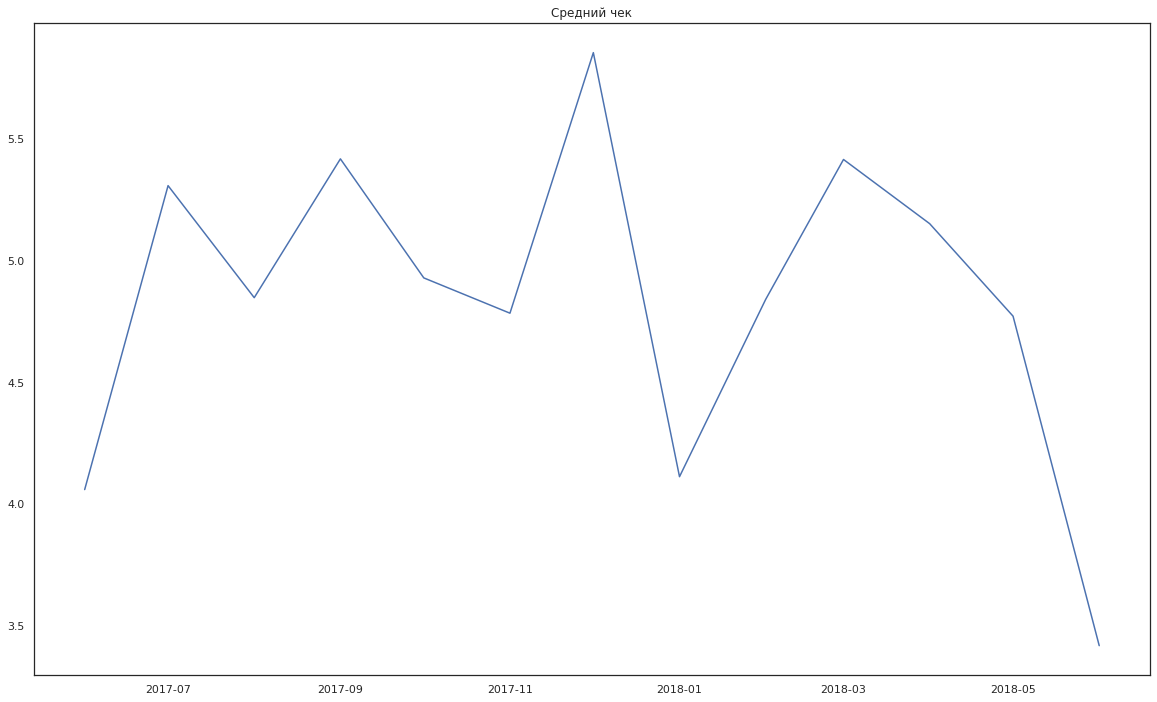

In [114]:
x = revenue_by_date['order_month']
y = revenue_by_date['revenue']

plt.figure(figsize=(20, 12))
plt.plot(x,y)
plt.title('Средний чек')
plt.show()

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Необходимо проанализировать динамику среднего чека. Выявить периодв когда средний чек минимален/максимален и пояснить с чем это может быть связано.
</div>

Максимальные значения средний чек показывает в декабре, Я думаю, это может быть связано с тем, что люди могут делать покупки на сайте в качестве подарка и покупать сразу несколько билетов, минимальные показывает сразу после этого в январе, мне кажется, это может быть связано с тем, что люди не так ходят на какие-то мероприятия после празников.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, верно, максимальные значения чек принимает в зимний период. Скорее всего в связи с Новогодними праздниками.
</div>

In [115]:
print('Средний чек за всё время равен:', revenue_by_date['revenue'].mean().round(1),'у.е.')

Средний чек за всё время равен: 4.8 у.е.


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, средний чек вычислен верно.
</div>

#### LTV

In [116]:
orders_to_month = df_orders.groupby('uid', as_index=False).agg({'order_month':'min'})
orders_to_month.rename(columns={'order_month':'first_order_month'}, inplace=True)
orders_cohort = df_orders.merge(orders_to_month, on='uid')
users_in_cohort = orders_cohort.groupby('first_order_month', as_index=False).agg({'uid':'nunique'})
users_in_cohort.rename(columns={'uid':'users_in_cohort'}, inplace=True)
orders_cohort = orders_cohort.merge(users_in_cohort, on='first_order_month')
orders_cohort['cohort_lifetime'] = (orders_cohort['order_month'] - orders_cohort['first_order_month']) / np.timedelta64(1, 'M')
orders_cohort['cohort_lifetime'] = orders_cohort['cohort_lifetime'].round().astype('int64')
orders_cohort['ltv'] = orders_cohort['revenue'] / orders_cohort['users_in_cohort']
display(orders_cohort)

,order_date,revenue,uid,month,order_month,first_order_month,users_in_cohort,cohort_lifetime,ltv
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2023,0,0.008403
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2023,0,0.000272
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2023,0,0.000183
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2023,0,0.000272
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2023,0,0.000183
...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,2018-05-01,2988,0,0.001553
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,2018-05-01,2988,0,0.001941
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,2018-05-01,2988,0,0.000100
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,2018-05-01,2988,0,0.001228


In [117]:
ltv_pivot = orders_cohort.pivot_table(index='first_order_month', values='ltv', columns='cohort_lifetime', aggfunc='sum')
ltv_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,0.485329,0.437637,0.954671,1.022531,0.735502,0.950440,0.581592,0.553213,0.605788,0.571261,0.256856
2017-07-01,6.010218,0.335211,0.623531,0.358976,0.176791,0.156048,0.120208,0.141820,0.161232,0.147145,0.155673,NaN
2017-08-01,5.276518,0.471993,0.458482,0.391277,0.494051,0.283540,0.210664,0.405007,0.292212,0.187978,NaN,NaN
2017-09-01,5.644529,1.117586,0.520930,3.975792,0.400558,0.647067,0.701608,0.243150,0.184006,NaN,NaN,NaN
2017-10-01,5.003733,0.535763,0.191394,0.157145,0.151560,0.120362,0.084816,0.115470,NaN,NaN,NaN,NaN
2017-11-01,5.154683,0.399233,0.199556,0.324952,0.148013,0.053879,0.114928,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,0.260374,0.925097,1.065275,0.312930,0.338047,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,0.294758,0.304281,0.142778,0.062698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,0.278274,0.078515,0.074144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:

ltv_pivot = ltv_pivot.cumsum(axis=1)

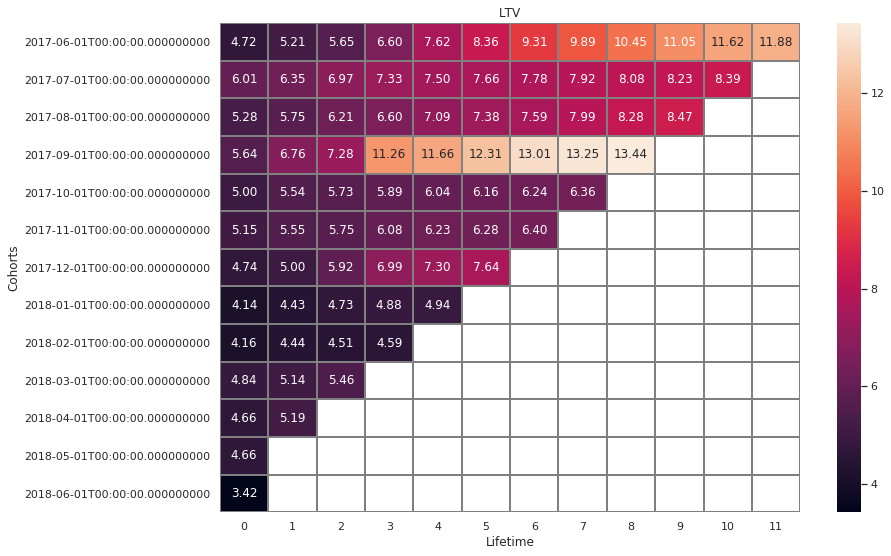

In [119]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(ltv_pivot, annot=True,fmt='.2f', linewidths=1, linecolor='gray')
plt.xlabel('Lifetime')
plt.ylabel('Cohorts')
plt.show()

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Отлично, LTV вычислен верно. Советую убрать timestamp "00:00:00" с дат.
</div>

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
Подсказка как можно удалить "00:00:00" с дат: https://coderoad.ru/28247778/Python-Pandas-%D1%83%D0%B4%D0%B0%D0%BB%D0%B8%D1%82%D1%8C-%D0%B4%D0%B0%D1%82%D1%83-%D0%B8%D0%B7-timestamp
</div>

In [120]:
ltv_pivot = ltv_pivot.loc[:, :5]
ltv_pivot = ltv_pivot[ltv_pivot[5].notna()]
display(ltv_pivot)

cohort_lifetime,0,1,2,3,4,5
first_order_month,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913


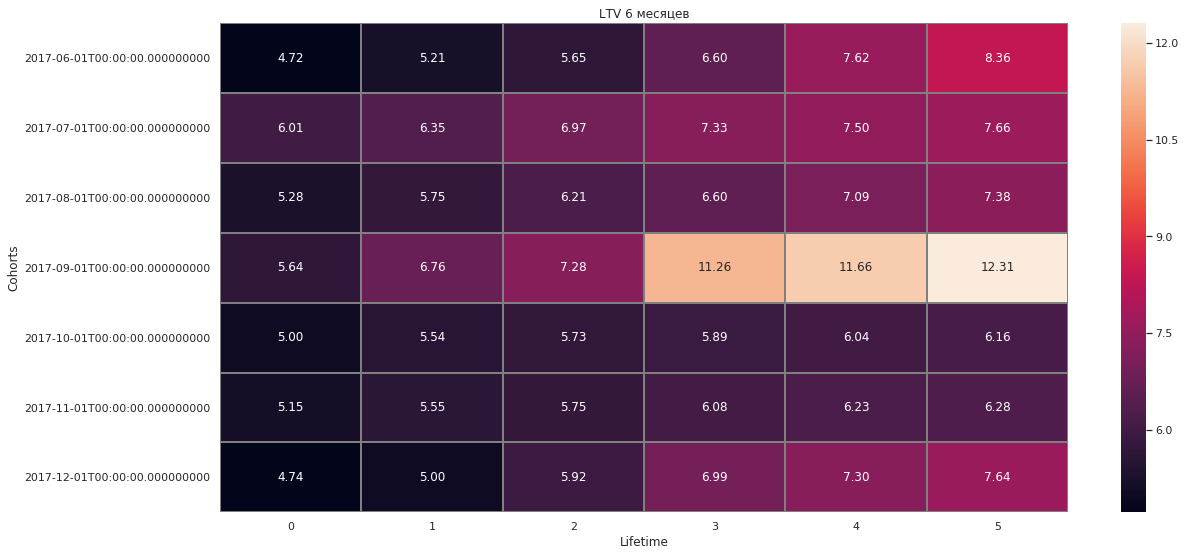

In [121]:
sns.set(style='white')
plt.figure(figsize=(19, 9))
plt.title('LTV 6 месяцев')
sns.heatmap(ltv_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')
plt.xlabel('Lifetime')
plt.ylabel('Cohorts')
plt.show()

In [122]:
print('Средний LTV по когортам за 6 месяцев',ltv_pivot[5].mean().round(2))

Средний LTV по когортам за 6 месяцев 7.97


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Отлично, средний LTV по когортам за 6 месяцев определён верно.
</div>

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Дополнительно можно исследовать когорту со стартом 2018-06-01 - как она у нас вообще могла возникнуть, много ли там покупателей, насколько она нам нужна и полезна.
</div>

### Маркетинговые метрики

#### Сумма рассхода на маркетинг

In [123]:
df_costs

,date,cost,source
0,2017-06-01,75.20,1
1,2017-06-02,62.25,1
2,2017-06-03,36.53,1
3,2017-06-04,55.00,1
4,2017-06-05,57.08,1
...,...,...,...
2537,2018-05-27,9.92,10
2538,2018-05-28,21.26,10
2539,2018-05-29,11.32,10
2540,2018-05-30,33.15,10


In [124]:
print('Всего потрачено на маркетинг {} у.е.'.format(df_costs['cost'].sum()))

Всего потрачено на маркетинг 329131.62 у.е.


<div class="alert alert-block alert-success">
Комментарий ревьюера v. 1:
    
Да, суммарные расходы вычислены верно. Молодец, что указал валюту.
</div>

In [125]:
costs_g = df_costs.groupby('source').sum().reset_index().sort_values('cost', ascending=False)

In [126]:
costs_g.head(10)

,source,cost
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


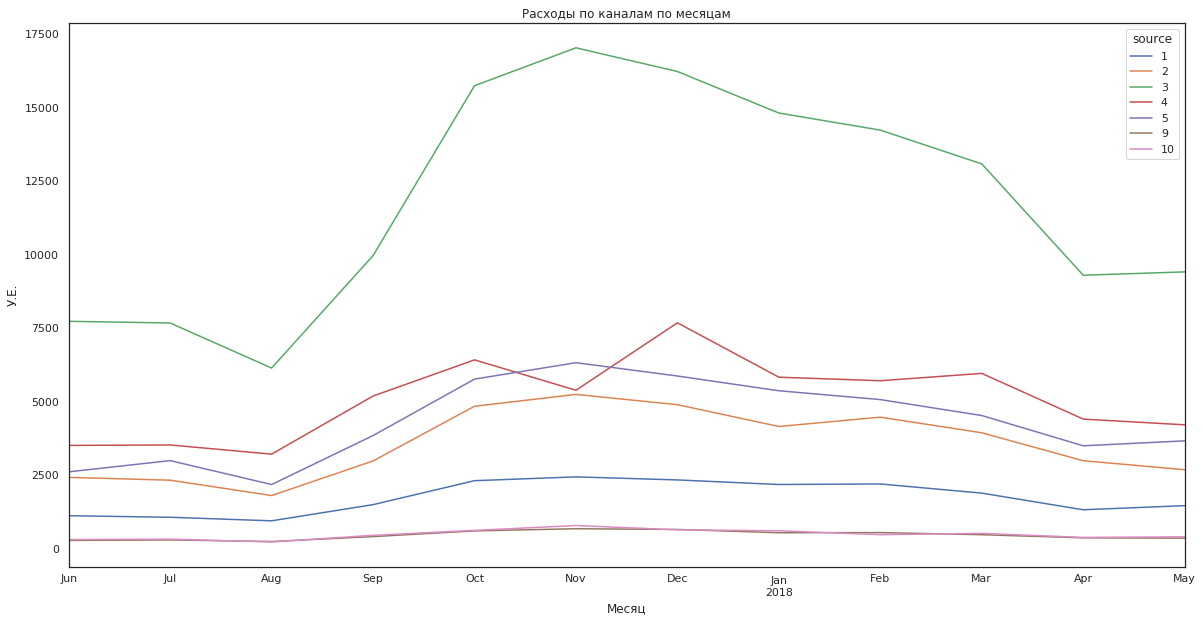

In [127]:
df_costs['month'] = df_costs['date'].astype('datetime64[M]')
costs_pivot = df_costs.pivot_table(index = 'month',
                                columns = 'source',
                                values = 'cost',
                                aggfunc = 'sum')

costs_pivot.plot(figsize = (20,10),
                 title = 'Расходы по каналам по месяцам')

plt.xlabel('Месяц')
plt.ylabel('У.Е.')
plt.show()

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Молодец, что построил график расходов по источникам, но нужно построить и график суммарных расходов по всем источникам. Совпадает ли динамика изменения суммарных расходов с динамикой изменения расходов по каждому из источников?
</div>

In [128]:
costs_by_source_group = df_costs.groupby('month').sum().reset_index()

In [129]:
costs_by_source_group

,month,cost,source
0,2017-06-01,18015.00,1020
1,2017-07-01,18240.59,1054
2,2017-08-01,14790.54,1054
3,2017-09-01,24368.91,1020
4,2017-10-01,36322.88,1054
5,2017-11-01,37907.88,1020
6,2017-12-01,38315.35,1054
7,2018-01-01,33518.52,1054
8,2018-02-01,32723.03,952
9,2018-03-01,30415.27,1025


<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
При необходимости вывод warnings можно убрать.
</div>

In [130]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

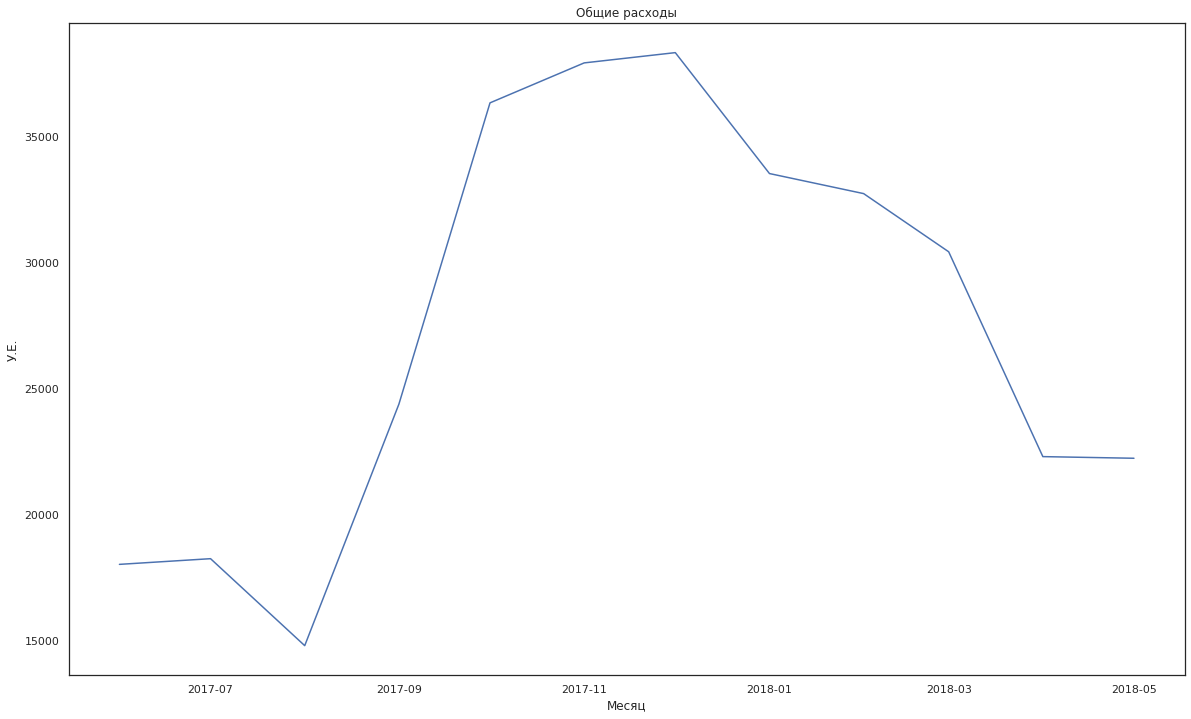

In [131]:
y = costs_by_source_group['cost']
x = costs_by_source_group['month']


plt.figure(figsize=(20, 12))
plt.plot(x,y)
plt.xlabel('Месяц')
plt.ylabel('У.Е.')
plt.title('Общие расходы')
plt.show()

В целом динамика расходов на маркетинг показывает, что расходы на маркетинг по одному из источников очень сильно влияет на динамику расходов по всем. Можно сказать, что расходы распределены не равномерно. Осенью и зимой они высокие, а летом низкие.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Отлично, динамика расходов проанализирована. 👍👍👍
</div>

#### CAC

In [132]:
df_costs

,date,cost,source,month
0,2017-06-01,75.20,1,2017-06-01
1,2017-06-02,62.25,1,2017-06-01
2,2017-06-03,36.53,1,2017-06-01
3,2017-06-04,55.00,1,2017-06-01
4,2017-06-05,57.08,1,2017-06-01
...,...,...,...,...
2537,2018-05-27,9.92,10,2018-05-01
2538,2018-05-28,21.26,10,2018-05-01
2539,2018-05-29,11.32,10,2018-05-01
2540,2018-05-30,33.15,10,2018-05-01


In [133]:
df_orders

,order_date,revenue,uid,month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01


In [134]:
orders_visits = df_orders.join(df_visits.sort_values(by='start').groupby('uid').agg({'source': 'first', 'device': \
                                                    'first', 'start': 'min'}), on='uid', how='inner')
display(orders_visits)

,order_date,revenue,uid,month,order_month,source,device,start
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,1,desktop,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2,desktop,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2,desktop,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2,desktop,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3,desktop,2017-06-01 07:31:00
...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,4,touch,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,10,desktop,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,3,desktop,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,3,desktop,2017-10-23 12:32:00


In [135]:
visits_grouped = orders_visits.groupby('source').agg({'uid':'nunique'}).reset_index()
display(visits_grouped)

,source,uid
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


In [136]:

#Сгруппирую таблицу с расходами по источникам трафика, подсчитаю количество расходов по каждому источнику:
costs_grouped = df_costs.groupby('source').agg({'cost': 'sum'}).reset_index()
display(costs_grouped)

,source,cost
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [137]:

#Объединю сгруппированную таблицу с расходами и с группированную таблицу с количеством покупателей по столбцу source_id:
visits_costs = pd.merge(costs_grouped, visits_grouped, on = 'source')
#Посчитаю среднее число расходов на одного покупателя, разделив столбец costs на столбец uid:
visits_costs['cac'] = visits_costs['cost'] / visits_costs['uid']
display(visits_costs)

,source,cost,uid,cac
0,1,20833.27,2899,7.186364
1,2,42806.04,3506,12.209367
2,3,141321.63,10473,13.493901
3,4,61073.60,10296,5.931779
4,5,51757.10,6931,7.467479
5,9,5517.49,1088,5.071222
6,10,5822.49,1329,4.381106


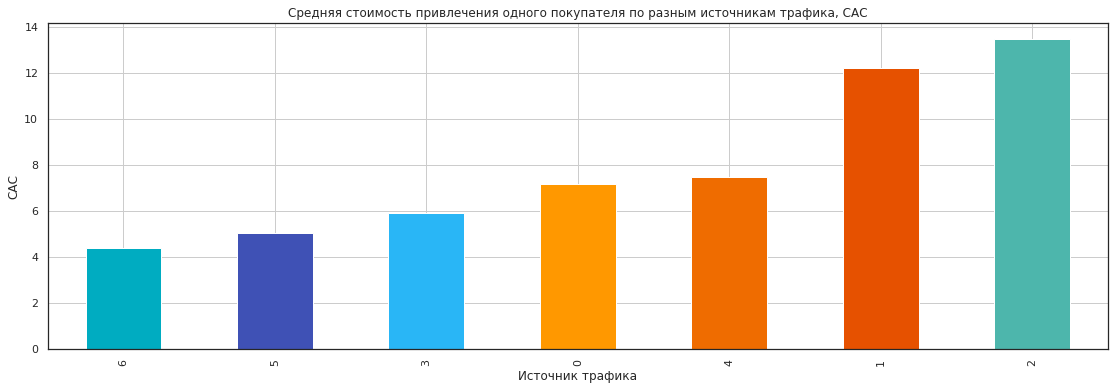

In [138]:

#Построю баровый график, визуализирующий среднее число расходов на покупателя по каждому источнику:
visits_costs['cac'].sort_values().plot.bar(figsize =(19,6), grid = True, color = ['#00acc1', '#3f51b5', '#29b6f6', \
'#ff9800','#ef6c00','#e65100','#4db6ac'], title = 'Средняя стоимость привлечения одного покупателя по разным источникам трафика, \
CAC')
plt.ylabel('CAC')
plt.xlabel('Источник трафика')
plt.show()

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Сформулируй, пожалуйста, вывод по анализу САС.
</div>

Самыми дорогими по стоимости привлечения являются третий и второй источник привлечения, самым дешёвый - десятый.

In [139]:
print('Средняя стоимость привлечения одного покупателя:', visits_costs['cac'].sum()/7 ,'У.Е.')

Средняя стоимость привлечения одного покупателя: 7.963031402494954 У.Е.


<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Проверь, пожалуйста, расчёт среднего САС.
</div>

Проверил стоимость среней стоимости привлечения клиентов

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 2:
    
Средний САС можно рассчитать как costs['costs'].sum() / orders['uid'].nunique().
</div>

#### ROMI

In [140]:
visits2 = df_visits.sort_values(['start'], ascending=True)
source_uids = visits2.groupby('uid', as_index=False).agg({'source':'first'})
display(source_uids)

,uid,source
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
228164,18446403737806311543,5
228165,18446424184725333426,4
228166,18446556406699109058,3
228167,18446621818809592527,4


In [141]:

orders2 = df_orders.merge(source_uids, on='uid')
display(orders2)

,order_date,revenue,uid,month,order_month,source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,3


In [142]:

source_numbers = orders2.groupby('source', as_index=False).agg({'uid':'nunique', 'revenue':'sum'})
costs2 = df_costs.groupby('source', as_index=False).agg({'cost':'sum'})
source_numbers = source_numbers.merge(costs2, on='source', how='outer')
source_numbers.rename(columns={'uid':'users'}, inplace=True)
source_numbers['cac'] = source_numbers['cost'] / source_numbers['users']
display(source_numbers.sort_values('cac', ascending=False))

,source,users,revenue,cost,cac
2,3,10473,54511.24,141321.63,13.493901
1,2,3506,46923.61,42806.04,12.209367
4,5,6931,52624.02,51757.10,7.467479
0,1,2899,31090.55,20833.27,7.186364
3,4,10296,56696.83,61073.60,5.931779
6,9,1088,5759.40,5517.49,5.071222
7,10,1329,4450.33,5822.49,4.381106
5,7,1,1.22,NaN,NaN


In [143]:
total_marketing_costs = df_costs['cost'].sum()
total_cac = total_marketing_costs / df_orders['uid'].nunique()
print('Средний CAC на одного покупателя для всего проекта равен {:.4f}'.format(total_cac))

Средний CAC на одного покупателя для всего проекта равен 9.0116


In [144]:
cac_per_month = orders2.groupby(['source', 'month'], as_index=False).agg({'uid':'nunique'})

In [145]:
cac_per_month = df_costs.merge(cac_per_month, on=['source', 'month'])

In [146]:
cac_per_month = cac_per_month.pivot_table(index=['source', 'month'],
                                          values=['cost', 'uid'], 
                                          aggfunc={'cost':'sum', 'uid':'first'}).reset_index()

In [147]:
cac_per_month['cac'] = cac_per_month['cost'] / cac_per_month['uid']
display(cac_per_month)

,source,month,cost,uid,cac
0,1,2017-06-01,1125.61,190,5.924263
1,1,2017-07-01,1072.88,176,6.095909
2,1,2017-08-01,951.81,128,7.436016
3,1,2017-09-01,1502.01,255,5.890235
4,1,2017-10-01,2315.75,376,6.158910
...,...,...,...,...,...
79,10,2018-01-01,614.35,98,6.268878
80,10,2018-02-01,480.88,134,3.588657
81,10,2018-03-01,526.41,199,2.645276
82,10,2018-04-01,388.25,118,3.290254


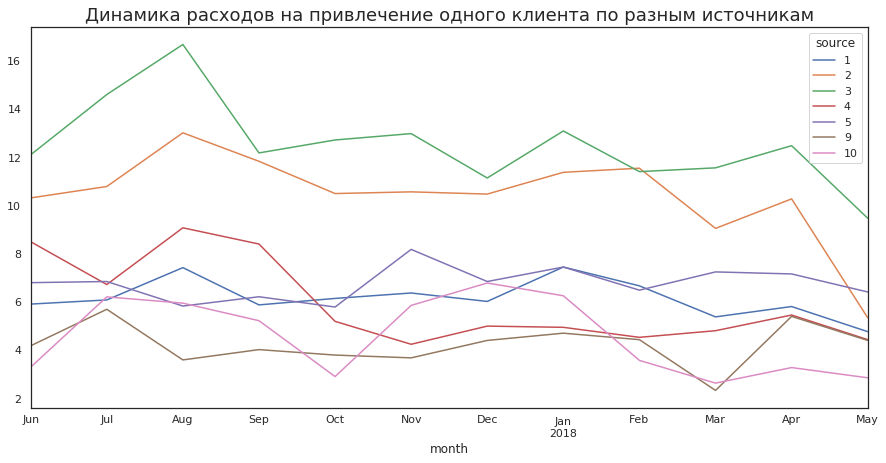

In [148]:
cac_per_month.pivot_table(index='month', columns='source', values='cac').plot(figsize=(15, 7))
plt.title('Динамика расходов на привлечение одного клиента по разным источникам', fontsize=18)
plt.show()

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Добавь, пожалуйста, описание/выводы к графику.
</div>

По этому графику можно сказать, что по каждому источнику стоимость привлечения очень разная, но можно сказать, что в течение года каждый из них не показывает каких-то скачков или падений.

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Да, всё верно :) Ещё нужно отметить что выделяются 2-3 и 3-й источники.
</div>

In [149]:
source_numbers['ltv'] = source_numbers['revenue'] / source_numbers['users']
source_numbers['romi'] = source_numbers['ltv'] / source_numbers['cac']
display(source_numbers.sort_values('romi', ascending=False))

,source,users,revenue,cost,cac,ltv,romi
0,1,2899,31090.55,20833.27,7.186364,10.724577,1.492351
1,2,3506,46923.61,42806.04,12.209367,13.383802,1.096191
6,9,1088,5759.40,5517.49,5.071222,5.293566,1.043844
4,5,6931,52624.02,51757.10,7.467479,7.592558,1.016750
3,4,10296,56696.83,61073.60,5.931779,5.506685,0.928336
7,10,1329,4450.33,5822.49,4.381106,3.348631,0.764335
2,3,10473,54511.24,141321.63,13.493901,5.204931,0.385725
5,7,1,1.22,NaN,NaN,1.220000,NaN


In [150]:
ord_coh = orders2.groupby('uid', as_index=False).agg({'month':'min'})
ord_coh.rename(columns={'month':'first_month'}, inplace=True)
ord_coh = orders2.merge(ord_coh, on='uid')
display(ord_coh)

,order_date,revenue,uid,month,order_month,source,first_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,1,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3,2017-06-01
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,4,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,10,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,3,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,3,2018-05-01


In [151]:
ord_coh2 = ord_coh.groupby('first_month', as_index=False).agg({'uid':'nunique'})
ord_coh2.rename(columns={'uid':'users_in_cohort'}, inplace=True)
ord_coh = ord_coh.merge(ord_coh2, on='first_month')
ord_coh['ltv'] = ord_coh['revenue'] / ord_coh['users_in_cohort']

In [152]:

ord_coh['lifetime'] = (ord_coh['month'] - ord_coh['first_month']) / np.timedelta64(1, 'M')
ord_coh['lifetime'] = ord_coh['lifetime'].round().astype('int64')
display(ord_coh)

,order_date,revenue,uid,month,order_month,source,first_month,users_in_cohort,ltv,lifetime
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,1,2017-06-01,2023,0.008403,0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2,2017-06-01,2023,0.000272,0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2,2017-06-01,2023,0.000183,0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2,2017-06-01,2023,0.000272,0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3,2017-06-01,2023,0.000183,0
...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,4,2018-05-01,2988,0.001553,0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,10,2018-05-01,2988,0.001941,0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,3,2018-05-01,2988,0.000100,0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,3,2018-05-01,2988,0.001228,0


In [153]:

cac_per_month2 = cac_per_month.drop(columns=['cac', 'uid'])
cac_per_month2.rename(columns={'month':'first_month'}, inplace=True)
ord_coh = ord_coh.merge(cac_per_month2, on=['source', 'first_month'])
display(ord_coh)

,order_date,revenue,uid,month,order_month,source,first_month,users_in_cohort,ltv,lifetime,cost
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,1,2017-06-01,2023,0.008403,0,1125.61
1,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01,1,2017-06-01,2023,0.000603,0,1125.61
2,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01,2017-06-01,1,2017-06-01,2023,0.000420,0,1125.61
3,2017-06-02 15:08:00,12.83,3644482766749211722,2017-06-01,2017-06-01,1,2017-06-01,2023,0.006342,0,1125.61
4,2017-06-04 13:06:00,17.11,3644482766749211722,2017-06-01,2017-06-01,1,2017-06-01,2023,0.008458,0,1125.61
...,...,...,...,...,...,...,...,...,...,...,...
50408,2018-05-31 15:26:00,2.14,5832940207941651411,2018-05-01,2018-05-01,9,2018-05-01,2988,0.000716,0,362.17
50409,2018-05-31 16:06:00,4.89,14372027836561602167,2018-05-01,2018-05-01,9,2018-05-01,2988,0.001637,0,362.17
50410,2018-05-31 17:20:00,3.42,13465334080837783919,2018-05-01,2018-05-01,9,2018-05-01,2988,0.001145,0,362.17
50411,2018-05-31 18:22:00,0.92,5359718846599854608,2018-05-01,2018-05-01,9,2018-05-01,2988,0.000308,0,362.17


In [154]:
ord_coh['cac'] = ord_coh['cost'] / ord_coh['users_in_cohort']
ord_coh['romi'] = ord_coh['ltv'] / ord_coh['cac']
display(ord_coh)

,order_date,revenue,uid,month,order_month,source,first_month,users_in_cohort,ltv,lifetime,cost,cac,romi
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,1,2017-06-01,2023,0.008403,0,1125.61,0.556406,0.015103
1,2017-06-01 09:22:00,1.22,3644482766749211722,2017-06-01,2017-06-01,1,2017-06-01,2023,0.000603,0,1125.61,0.556406,0.001084
2,2017-06-02 12:44:00,0.85,3644482766749211722,2017-06-01,2017-06-01,1,2017-06-01,2023,0.000420,0,1125.61,0.556406,0.000755
3,2017-06-02 15:08:00,12.83,3644482766749211722,2017-06-01,2017-06-01,1,2017-06-01,2023,0.006342,0,1125.61,0.556406,0.011398
4,2017-06-04 13:06:00,17.11,3644482766749211722,2017-06-01,2017-06-01,1,2017-06-01,2023,0.008458,0,1125.61,0.556406,0.015201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50408,2018-05-31 15:26:00,2.14,5832940207941651411,2018-05-01,2018-05-01,9,2018-05-01,2988,0.000716,0,362.17,0.121208,0.005909
50409,2018-05-31 16:06:00,4.89,14372027836561602167,2018-05-01,2018-05-01,9,2018-05-01,2988,0.001637,0,362.17,0.121208,0.013502
50410,2018-05-31 17:20:00,3.42,13465334080837783919,2018-05-01,2018-05-01,9,2018-05-01,2988,0.001145,0,362.17,0.121208,0.009443
50411,2018-05-31 18:22:00,0.92,5359718846599854608,2018-05-01,2018-05-01,9,2018-05-01,2988,0.000308,0,362.17,0.121208,0.002540


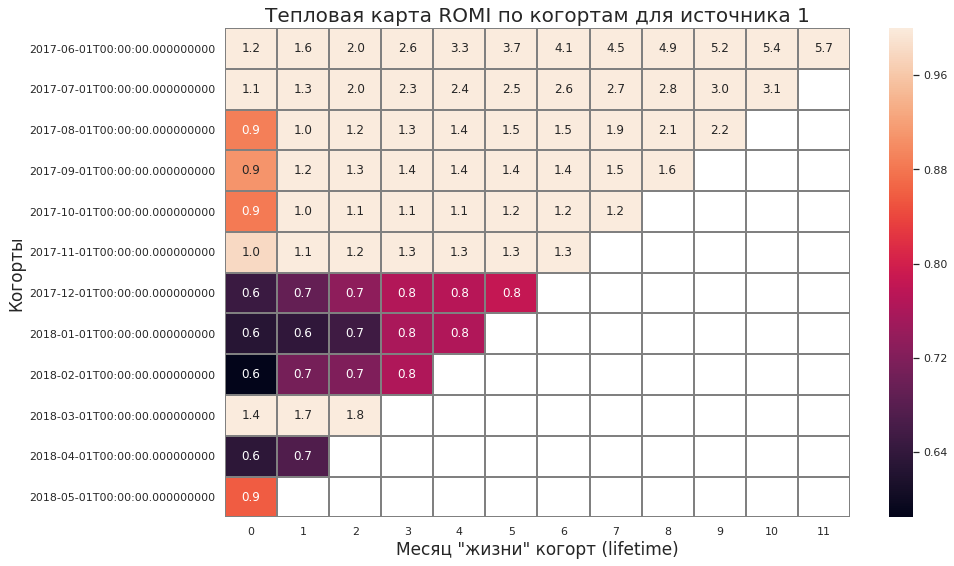

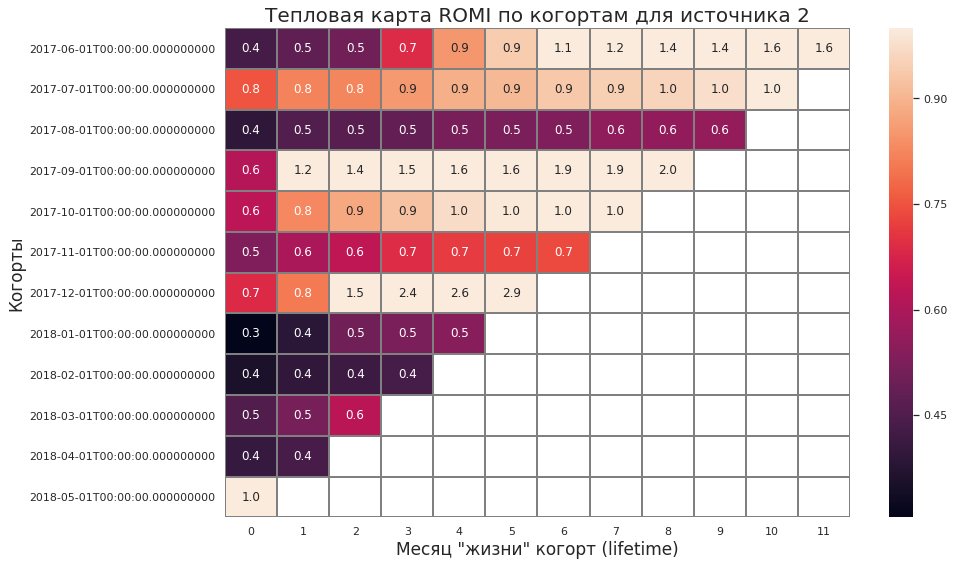

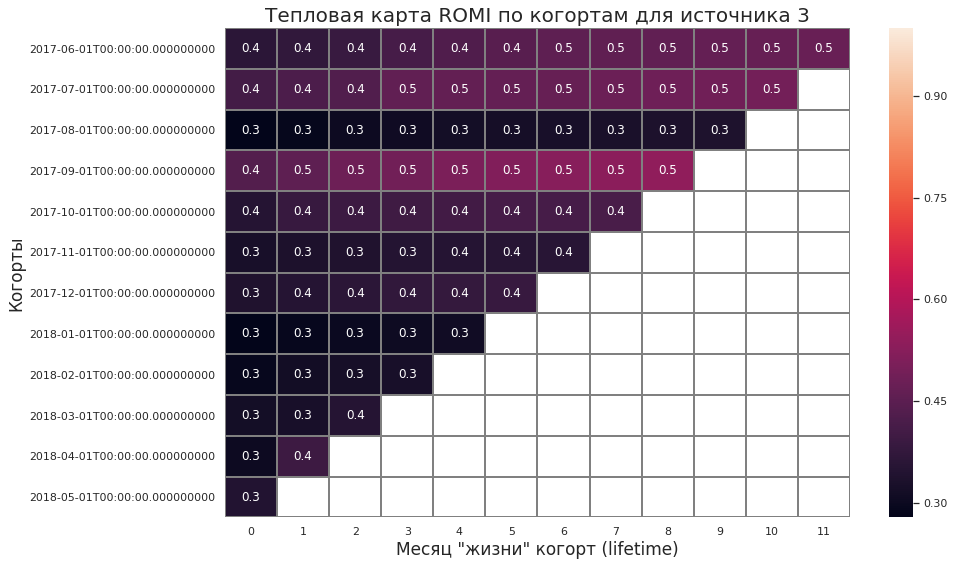

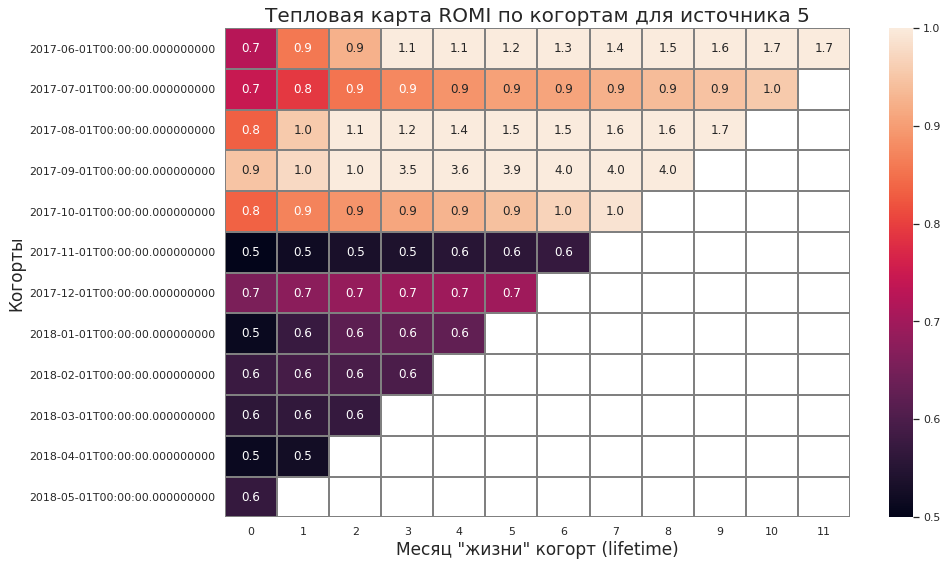

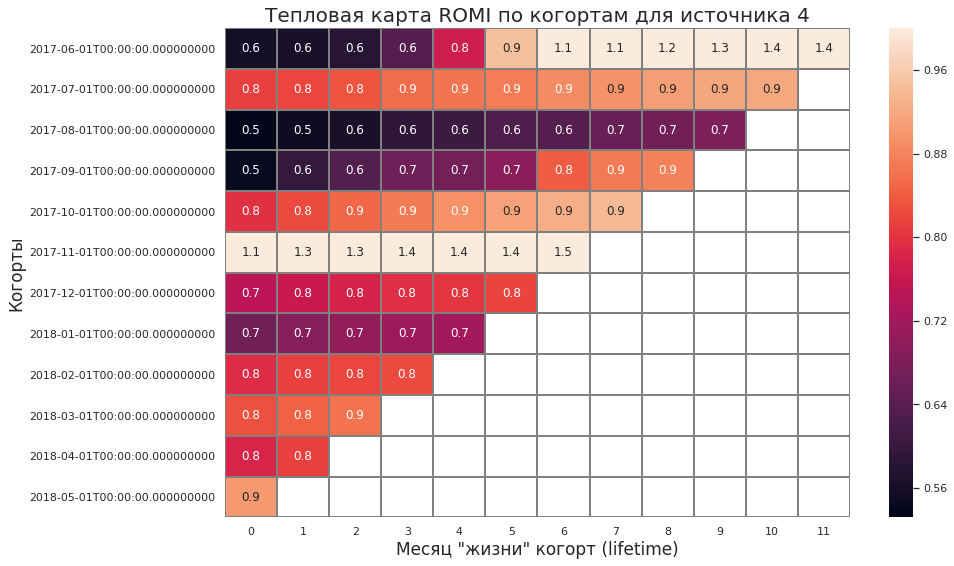

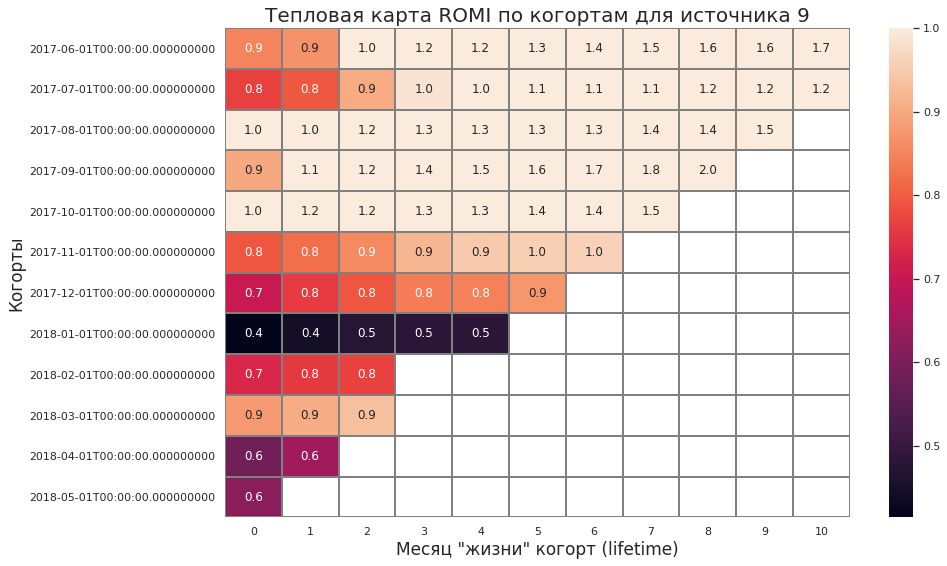

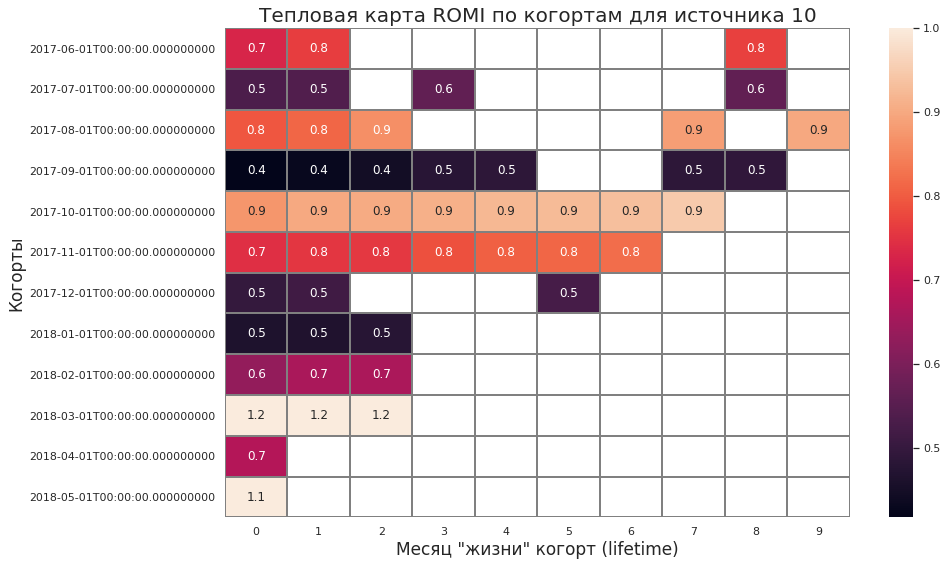

In [155]:

for i in ord_coh['source'].unique():
    pivot_source = ord_coh[ord_coh['source'] == i].pivot_table(index='first_month', 
                                                            columns='lifetime', 
                                                            values='romi',
                                                            aggfunc='sum')
    pivot_source = pivot_source.cumsum(axis=1)
    sns.set(style='white')
    plt.figure(figsize=(14, 9))
    plt.title('Тепловая карта ROMI по когортам для источника {}'.format(i), fontsize=20)
    sns.heatmap(pivot_source, annot=True, fmt='.1f', vmax=1, linewidths=1, linecolor='gray')
    plt.xlabel('Месяц "жизни" когорт (lifetime)', fontsize=17)
    plt.ylabel('Когорты', fontsize=17)
    plt.show()

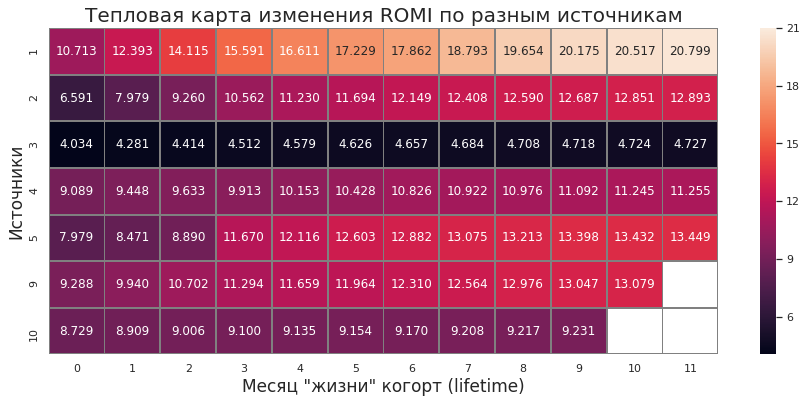

In [156]:
pivot_source2 = ord_coh.pivot_table(index='source', 
                                    columns='lifetime', 
                                    values='romi', 
                                    aggfunc='sum')
pivot_source2 = pivot_source2.cumsum(axis=1)
sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Тепловая карта изменения ROMI по разным источникам', fontsize=20)
sns.heatmap(pivot_source2, annot=True, fmt='.3f', vmax=21, linewidths=1, linecolor='gray')
plt.xlabel('Месяц "жизни" когорт (lifetime)', fontsize=17)
plt.ylabel('Источники', fontsize=17)
plt.show()

Первый источник проявил себя хорошо и видна даже перспектива окупаймости всех кагорт. Второй и четвёртый источники проявили себя плохо. У второго окупились только пять кагорт, а остальные не показывают роста. У четвёртого окупились лишь две, но у остальных есть патенциал. Третий и десяый источники вообще не покупаются и нет никаких перспектив. Четвёртый окупается так же как и пятый не слишком хорошо. Девятый проявил себя хорошо, у него окупились 6 кагорт, но остальные не показывают роста. Тоже самое и с пятым, у него окупилось 5 кагорт, но остальные роста не показывают и я не думаю, что покажут.

<div class="alert alert-block alert-danger">
Комментарий ревьюера v. 1:
    
Необходимо проанализировать окупаемость каждого из источников.
</div>

<div class="alert alert-block alert-success">
Комментарий ревьюера v. 2:
    
Ок :)
</div>

## Выводы и рекомендации

#### Источники трафика


Маркетологам стоит знать, что наилучшие показатели судя по тепловым картам у источников номер 1 и номер 9. Самые плохие показатели у источника 3 и 10. Также стоит сказать, что стоимость привлечения пользователя не пропорциональна доходу. Самые дорогие источники 3 и 2 показали плохие показатели по окупаемости, а вот источники средние по стоимости показали хорошие.

#### Выводы по метрикам

По продуктовым метрикам можно сказать, что пользователи редко возвращаются. Об этом говорит показатель Retention Rate = 4%. От визита до покупки проходит около 30 минут. Здесь ещё стоит сказать, что в данных присутсвует очень много нулевых сессий. В среднем пользователи пользуются сайтом около одного раза в месяц и чаще всего в холодное время года. Средний чек равен 4.8 у.е.

#### Самые перспективные когорты клиентов

Самой перспективной оказалась первая июньская кагорта.

<div class="alert alert-block alert-warning">
Комментарий ревьюера v. 1:
    
Рекомендую дополнить общий вывод, т. е. опиши все основные результаты проекта (используемые данные, выявленные аномалии и закономерности, выводы и т. д.).
</div>